In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, r2_score
import joblib, scipy
from imblearn.over_sampling import SMOTE
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf
from keras.layers.core import Dropout

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('star_classification.csv')
df.head()

obj_ID   alpha  delta      u      g      r      i      z  \
0 1237660961327743232.000 135.689 32.495 23.879 22.275 20.395 19.166 18.794   
1 1237664879951151104.000 144.826 31.274 24.778 22.832 22.584 21.168 21.614   
2 1237660961330430208.000 142.189 35.582 25.263 22.664 20.610 19.349 18.948   
3 1237663478724297984.000 338.741 -0.403 22.137 23.777 21.612 20.505 19.250   
4 1237680272041378048.000 345.283 21.184 19.437 17.580 16.497 15.977 15.545   

   run_ID  rerun_ID  cam_col  field_ID              spec_obj_ID   class  \
0    3606       301        2        79  6543777369295181824.000  GALAXY   
1    4518       301        5       119 11760142036707334144.000  GALAXY   
2    3606       301        2       120  5152200256025548800.000  GALAXY   
3    4192       301        3       214 10301071412954419200.000  GALAXY   
4    8102       301        3       137  6891864880783316992.000  GALAXY   

   redshift  plate    MJD  fiber_ID  
0     0.635   5812  56354       171  
1     0.779  10445  58158       427  
2     0.644   4576  55592       299  
3     0.932   9149  58039       775  
4     0.116   6121  56187       842

In [4]:
df.shape

(100000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df.describe()

obj_ID      alpha      delta          u          g  \
count              100000.000 100000.000 100000.000 100000.000 100000.000   
mean  1237664721814577152.000    177.629     24.135     21.980     20.531   
std         8438559894562.677     96.502     19.645     31.769     31.750   
min   1237645942904389888.000      0.006    -18.785  -9999.000  -9999.000   
25%   1237659161195119360.000    127.518      5.147     20.352     18.965   
50%   1237663463144292864.000    180.901     23.646     22.179     21.100   
75%   1237668350286447104.000    233.895     39.902     23.687     22.124   
max   1237680531356386304.000    360.000     83.001     32.781     31.602   

               r          i          z     run_ID   rerun_ID    cam_col  \
count 100000.000 100000.000 100000.000 100000.000 100000.000 100000.000   
mean      19.646     19.085     18.669   4481.366    301.000      3.512   
std        1.855      1.758     31.728   1964.765      0.000      1.587   
min        9.822      9.470  -9999.000    109.000    301.000      1.000   
25%       18.136     17.732     17.461   3187.000    301.000      2.000   
50%       20.125     19.405     19.005   4188.000    301.000      4.000   
75%       21.045     20.396     19.921   5326.000    301.000      5.000   
max       29.572     32.141     29.384   8162.000    301.000      6.000   

        field_ID              spec_obj_ID   redshift      plate        MJD  \
count 100000.000               100000.000 100000.000 100000.000 100000.000   
mean     186.131  5783882297557275648.000      0.577   5137.010  55588.647   
std      149.011  3324016169583855104.000      0.731   2952.303   1808.484   
min       11.000   299519089380976640.000     -0.010    266.000  51608.000   
25%       82.000  2844137590766986752.000      0.055   2526.000  54234.000   
50%      146.000  5614883135353542656.000      0.424   4987.000  55868.500   
75%      241.000  8332144107427485696.000      0.704   7400.250  56777.000   
max      989.000 14126940609093851136.000      7.011  12547.000  58932.000   

        fiber_ID  
count 100000.000  
mean     449.313  
std      272.498  
min        1.000  
25%      221.000  
50%      433.000  
75%      645.000  
max     1000.000

In [7]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [obj_ID, alpha, delta, u, g, r, i, z, run_ID, rerun_ID, cam_col, field_ID, spec_obj_ID, class, redshift, plate, MJD, fiber_ID]
Index: []

There is no missing and duplicate data present in the dataset.

## Data Preprocessing and Exploratory Data Analysis

## Univariate Analysis

Obj_Id
Skewness: 0.39872717908199823
Kurtosis: -0.6061681827640228
Distribution Plot:


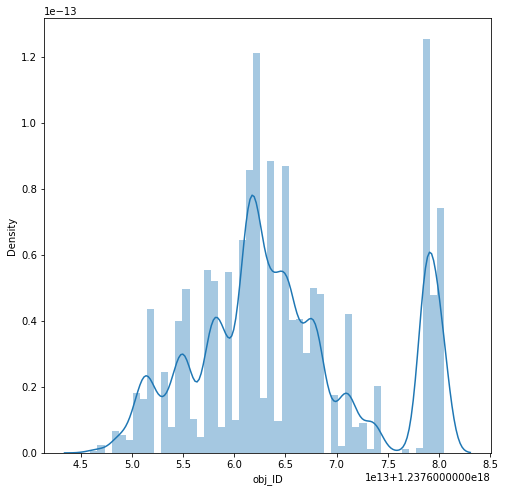

Box Plot:


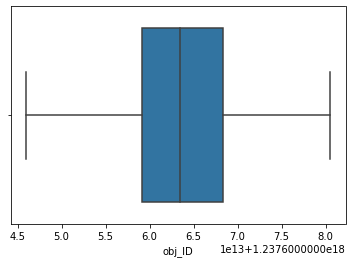

Quantile-Quantile Plot:


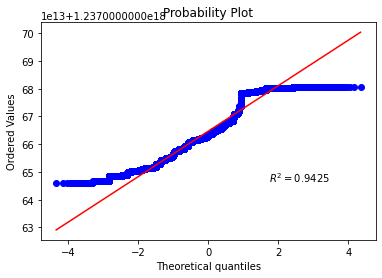

-------------------------
Alpha
Skewness: -0.028510865453805028
Kurtosis: -0.5371908037277096
Distribution Plot:


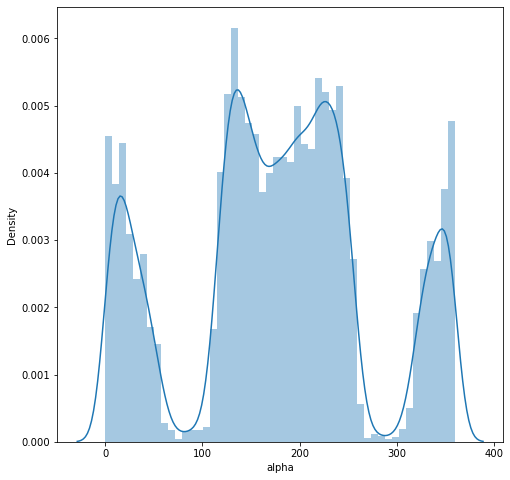

Box Plot:


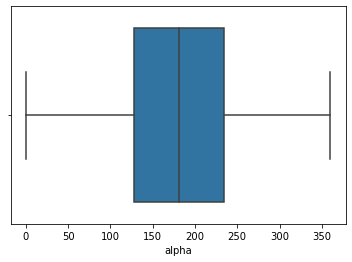

Quantile-Quantile Plot:


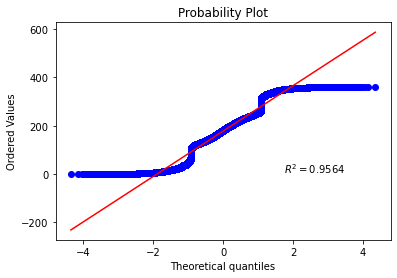

-------------------------
Delta
Skewness: 0.1750785620755768
Kurtosis: -1.0430621953397208
Distribution Plot:


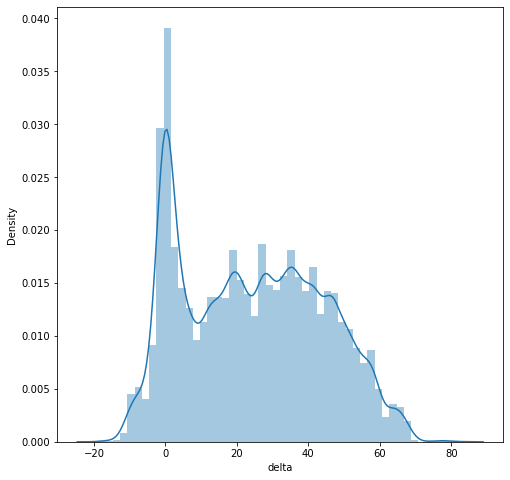

Box Plot:


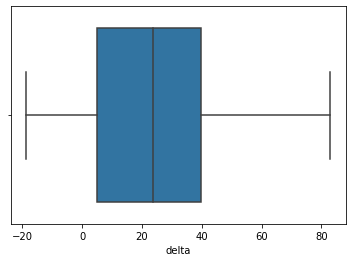

Quantile-Quantile Plot:


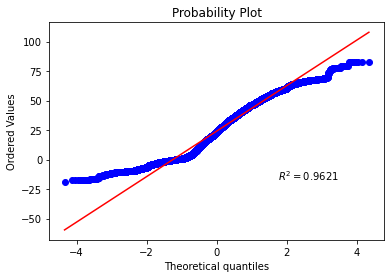

-------------------------
U
Skewness: -313.84924237751426
Kurtosis: 98998.36515698693
Distribution Plot:


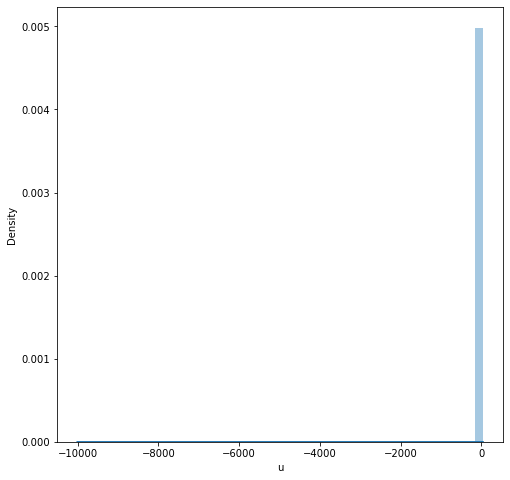

Box Plot:


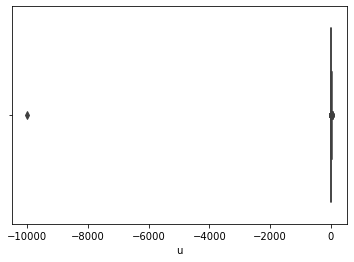

Quantile-Quantile Plot:


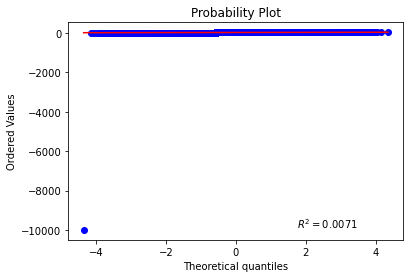

-------------------------
G
Skewness: -314.2766945750886
Kurtosis: 99178.14734351567
Distribution Plot:


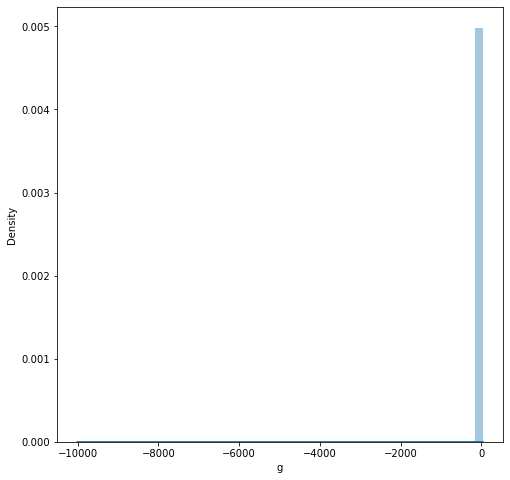

Box Plot:


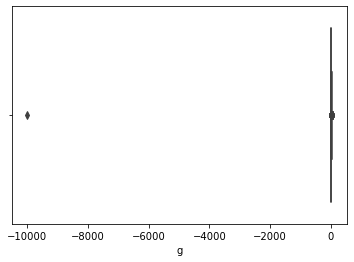

Quantile-Quantile Plot:


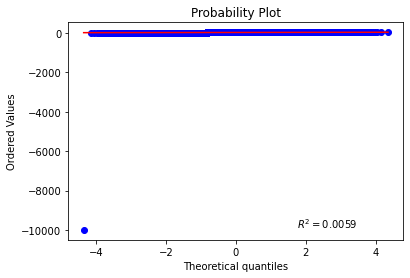

-------------------------
R
Skewness: -0.5078584323335763
Kurtosis: -0.37615756353922114
Distribution Plot:


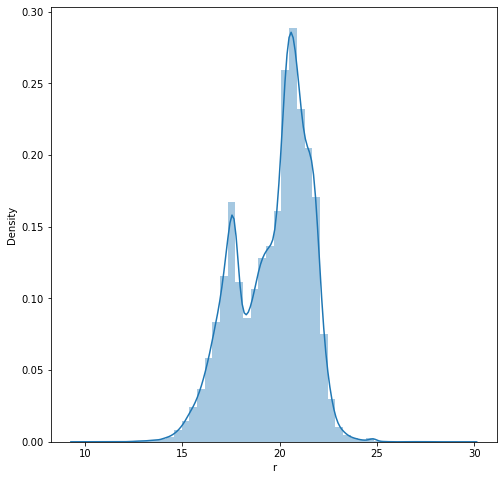

Box Plot:


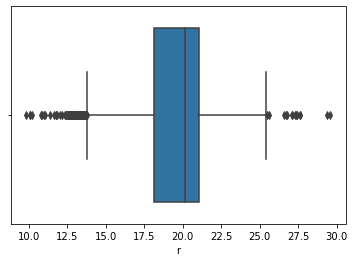

Quantile-Quantile Plot:


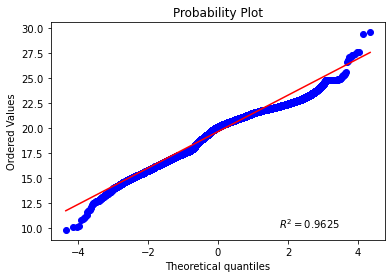

-------------------------
I
Skewness: -0.40416673966780764
Kurtosis: -0.23484446316863306
Distribution Plot:


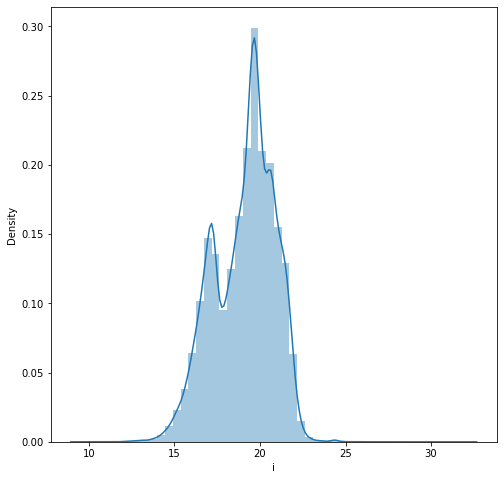

Box Plot:


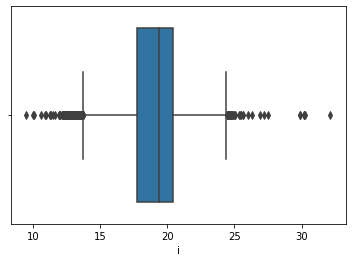

Quantile-Quantile Plot:


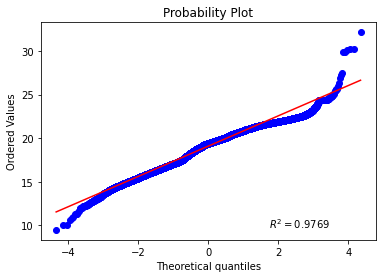

-------------------------
Z
Skewness: -314.759418791375
Kurtosis: 99381.34524315965
Distribution Plot:


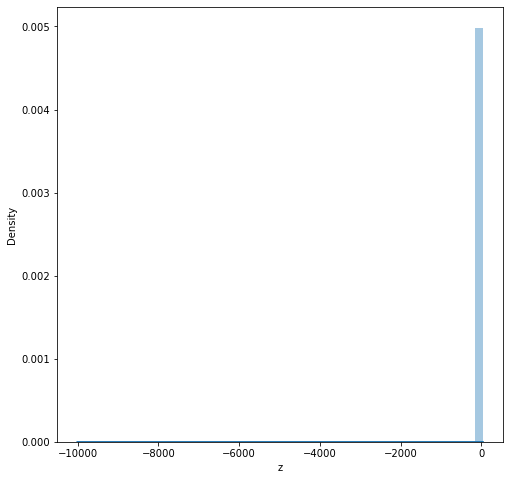

Box Plot:


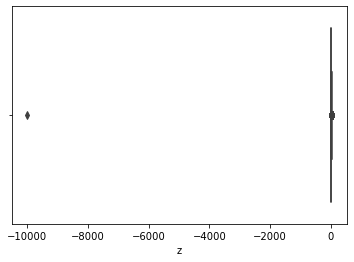

Quantile-Quantile Plot:


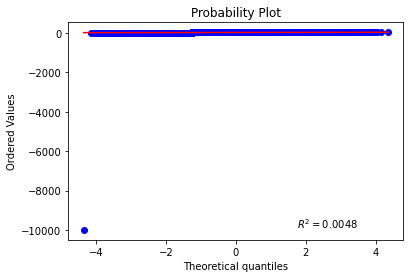

-------------------------
Run_Id
Skewness: 0.3987105222898206
Kurtosis: -0.6061694244851901
Distribution Plot:


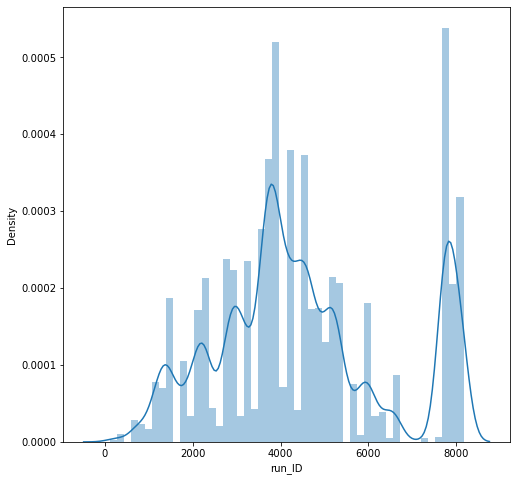

Box Plot:


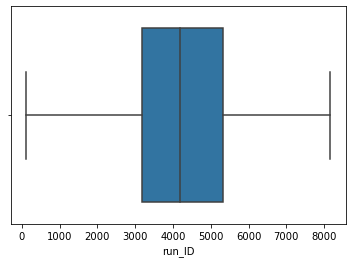

Quantile-Quantile Plot:


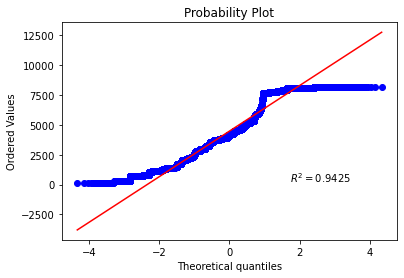

-------------------------
Rerun_Id
Skewness: 0
Kurtosis: 0
Distribution Plot:


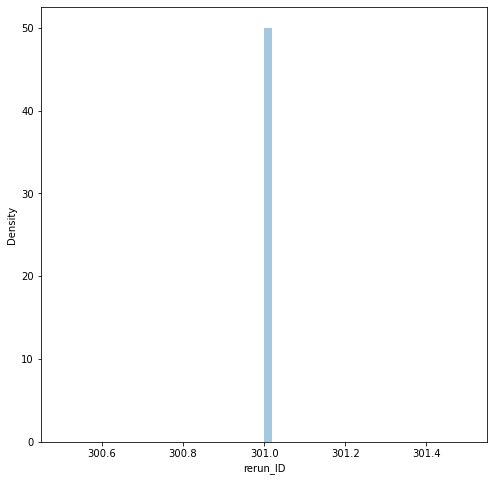

Box Plot:


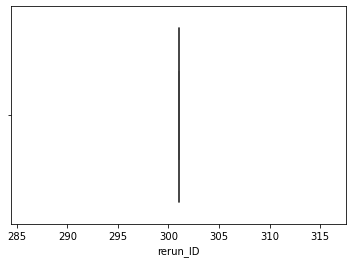

Quantile-Quantile Plot:


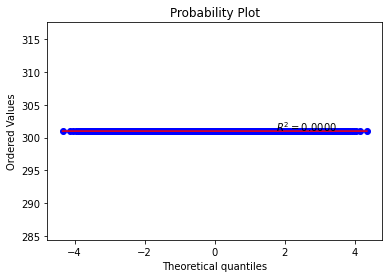

-------------------------
Cam_Col
Skewness: -0.030531673216738223
Kurtosis: -1.114304881728583
Distribution Plot:


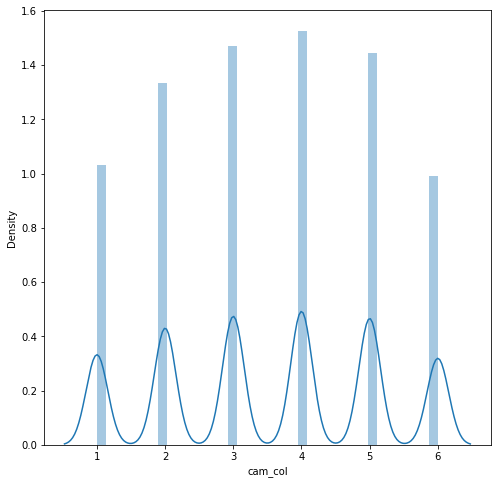

Box Plot:


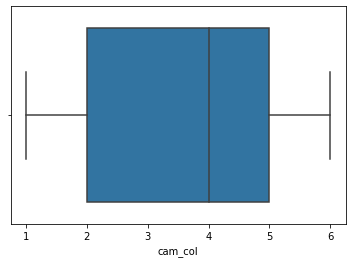

Quantile-Quantile Plot:


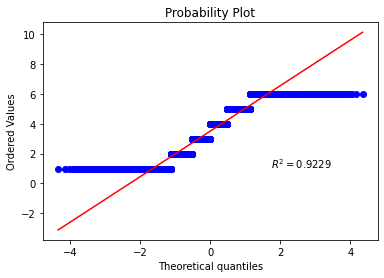

-------------------------
Field_Id
Skewness: 1.7534250595460243
Kurtosis: 3.703783011260478
Distribution Plot:


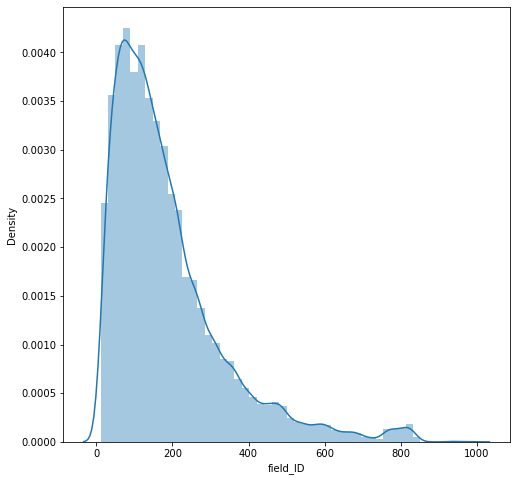

Box Plot:


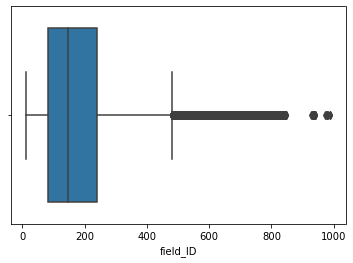

Quantile-Quantile Plot:


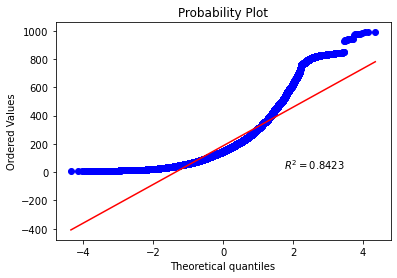

-------------------------
Spec_Obj_Id
Skewness: 0.19846274634146077
Kurtosis: -0.9047598893021798
Distribution Plot:


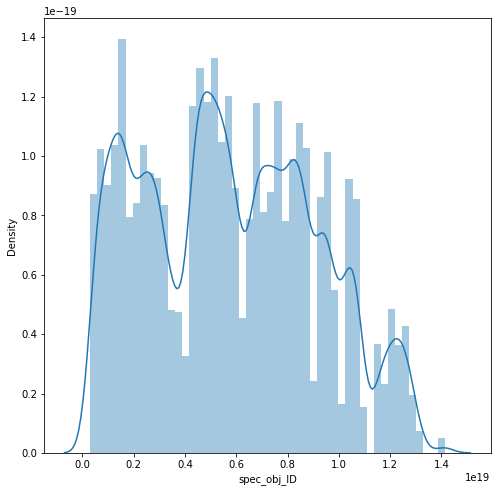

Box Plot:


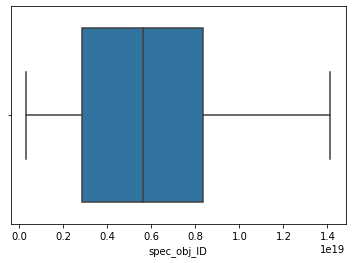

Quantile-Quantile Plot:


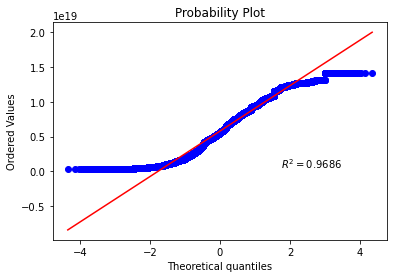

-------------------------
Redshift
Skewness: 2.5236063310340415
Kurtosis: 9.972915512318918
Distribution Plot:


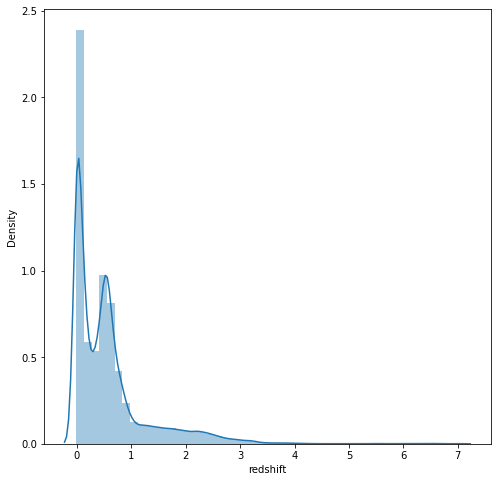

Box Plot:


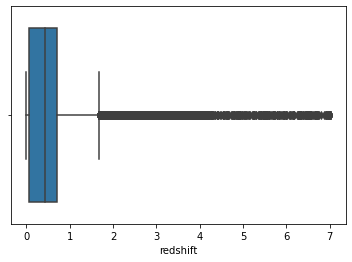

Quantile-Quantile Plot:


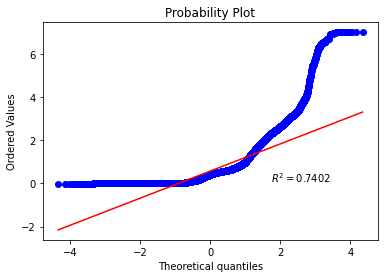

-------------------------
Plate
Skewness: 0.19847180267952066
Kurtosis: -0.9047511113310538
Distribution Plot:


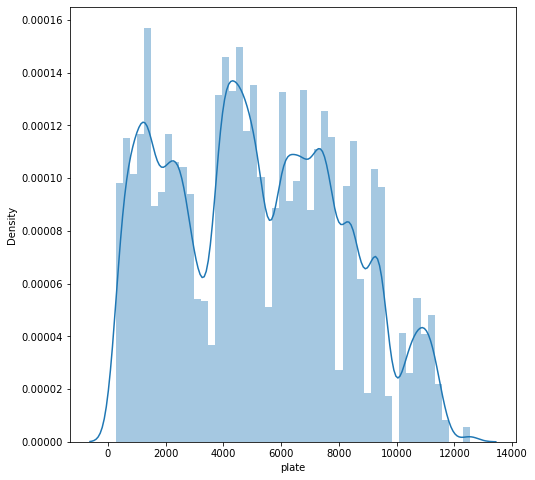

Box Plot:


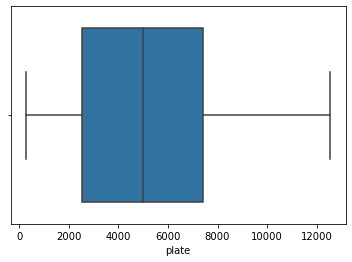

Quantile-Quantile Plot:


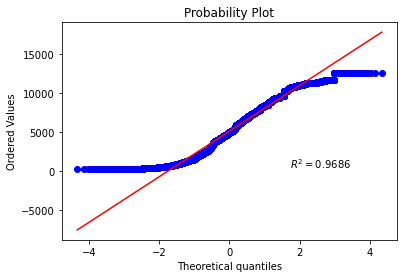

-------------------------
Mjd
Skewness: -0.3818531750786742
Kurtosis: -0.7731523267310263
Distribution Plot:


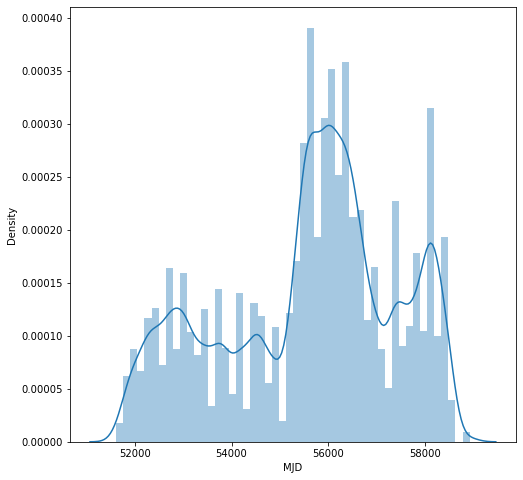

Box Plot:


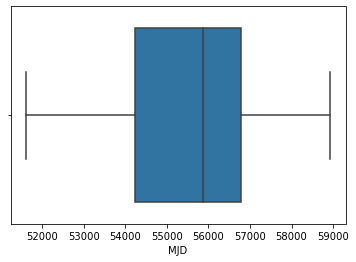

Quantile-Quantile Plot:


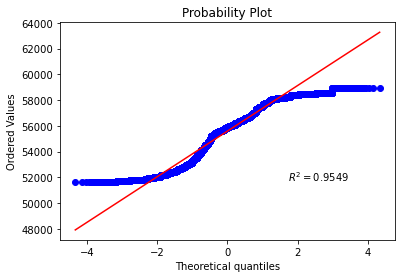

-------------------------
Fiber_Id
Skewness: 0.2297191201328803
Kurtosis: -0.98072188538332
Distribution Plot:


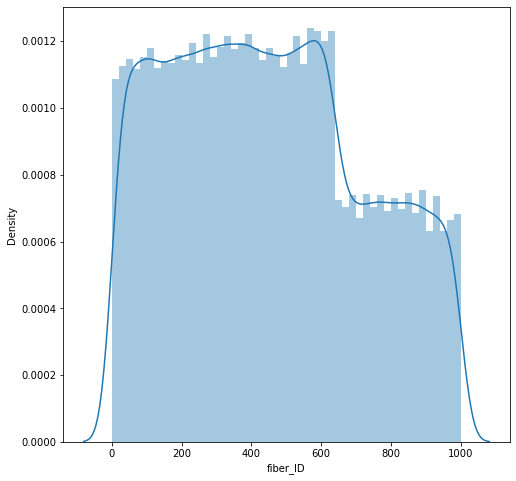

Box Plot:


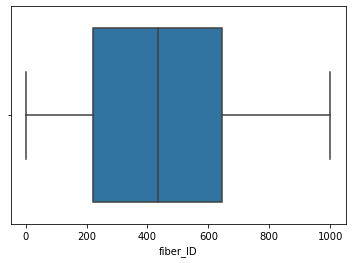

Quantile-Quantile Plot:


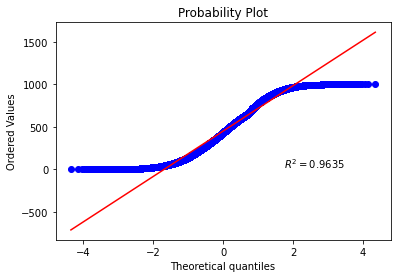

-------------------------


In [9]:
for col in df.columns:
    if col not in ['class']:
        print(col.title())
        print("Skewness:",df[col].skew())
        print("Kurtosis:",df[col].kurt())
        print("Distribution Plot:")
        plt.figure(figsize=(8,8))
        sns.distplot(df[col])
        plt.show()
        print("Box Plot:")
        sns.boxplot(df[col])
        plt.show()
        print("Quantile-Quantile Plot:")
        scipy.stats.probplot(df[col],plot=plt,rvalue=True)
        plt.show()
        print('-------------------------')

The distributions of features, "Field_Id" and "Redshift", are highly right skewed whereas those of features, "U", "G" and "Z" are substantially left skewed. Furthermore, there are numerous features which have presence of outliers in their corresponding distributions. The feature "rerun_ID" has zero variance so it can simply be eliminated as it isn't useful from the context of our analysis.

In [10]:
df.drop('rerun_ID',axis=1,inplace=True)

A modified version of the Julian date denoted MJD obtained by subtracting 2,400,000.5 days from the Julian date JD, The MJD therefore gives the number of days since midnight on November 17, 1858. This date corresponds to 2400000.5 days after day 0 of the Julian calendar.

So, what I'm gonna do is that I'm going to convert the feature 'Modified Julian Date' to 'Modified Julian Years'[MJY] by dividing the total number of days by 365 and subsequently, I'm gonna drop the MJD column.

In [11]:
df['MJY'] = df.MJD / 365.0

In [12]:
df.drop('MJD',axis=1,inplace=True)

([<matplotlib.patches.Wedge at 0x19c139be8b0>,
 [Text(-0.35086606341172927, 1.1475595869260804, 'GALAXY'),
  Text(-0.3239728189314008, -1.0512095949874325, 'STAR'),
  Text(0.9105454841380407, -0.6171765722350625, 'QSO')],
 [Text(-0.2046718703235087, 0.6694097590402136, '59.4%'),
  Text(-0.17671244668985497, -0.5733870518113268, '21.6%'),
  Text(0.49666117316620395, -0.33664176667367046, '19.0%')])

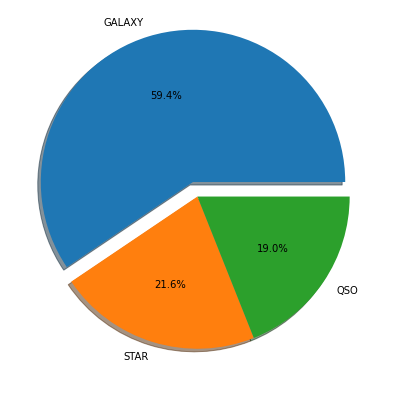

In [13]:
labels = df['class'].value_counts().keys()
values = df['class'].value_counts().values
explode = (0.1,0,0)
plt.figure(figsize=(13,7))
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')

<AxesSubplot:xlabel='class', ylabel='count'>

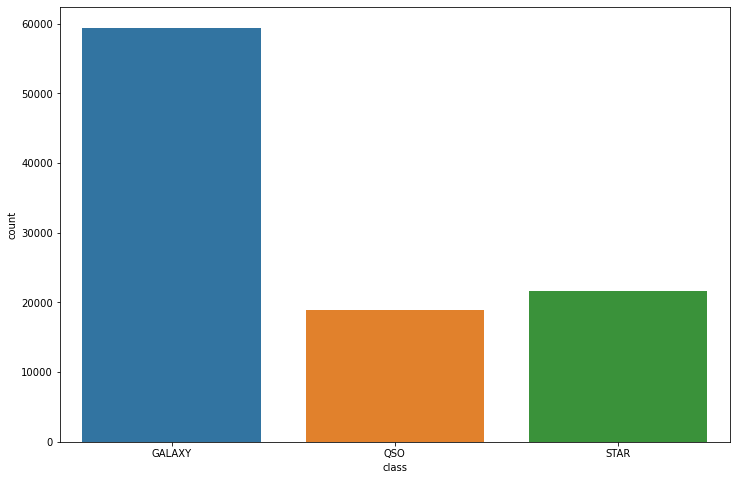

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(df['class'])

A significant proportion of the dependent feature column, "class" went for "GALAXY" which contributed to more than half of the gross share. Each of the target classes, "STAR" as well as "QSO", accounted for nearly one-fifth of the total share.

Moreover, the count plot suggests that the target classes are highly imbalanced with "GALAXY" being the majority class and "QSO" & "STAR" constituting the minority classes. This may have an adverse effect on the performance and efficiency of the machine learning models. So, the dependent feature column needs to be over-sampled using one of Imbalanced Learn library's oversampling techniques so that the target classes can be balanced out. 

## Bivariate Analysis

In [15]:
cc = np.corrcoef(df.drop('class',axis=1), rowvar=False)
VIF = np.linalg.inv(cc)
pd.DataFrame(df.drop('class',axis=1).columns,VIF.diagonal())

0
-1458700207023182.750       obj_ID
1.053                        alpha
1.211                        delta
870.266                          u
2730.782                         g
33.213                           r
32.117                           i
1501.786                         z
-1458711965250208.750       run_ID
-14868764.095              cam_col
-1952.483                 field_ID
240902827692246.188    spec_obj_ID
1.406                     redshift
240900203965435.844          plate
122328.356                fiber_ID
18.715                         MJY

In [16]:
temp = df.drop('class',axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = temp.columns
vif_data['VIF'] = [variance_inflation_factor(temp.values,i) for i in range(len(temp.columns))]

In [17]:
vif_data

Feature            VIF
0        obj_ID          0.000
1         alpha          1.000
2         delta          1.013
3             u          1.001
4             g          1.002
5             r          1.752
6             i          1.779
7             z          1.001
8        run_ID          1.061
9       cam_col          1.000
10     field_ID          1.007
11  spec_obj_ID          0.329
12     redshift          1.178
13        plate 2090999349.927
14     fiber_ID          1.062
15          MJY         17.017

<AxesSubplot:xlabel='i', ylabel='r'>

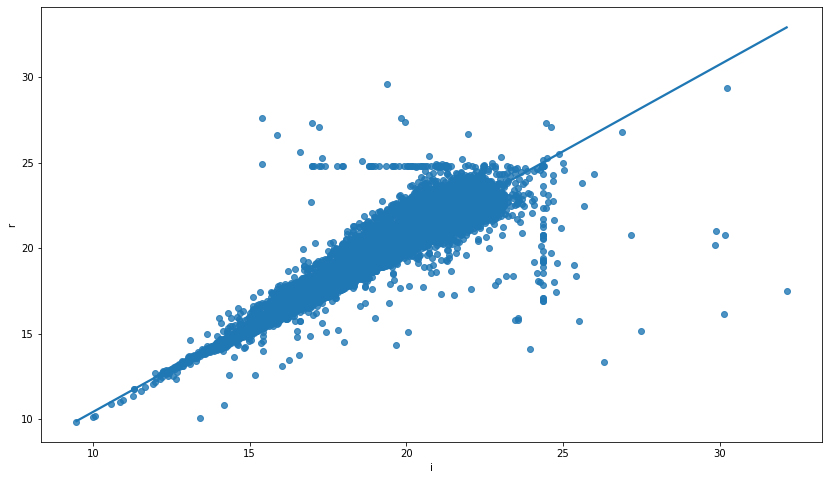

In [18]:
plt.figure(figsize=(14,8))
sns.regplot(df.i,df.r)

<AxesSubplot:xlabel='u', ylabel='g'>

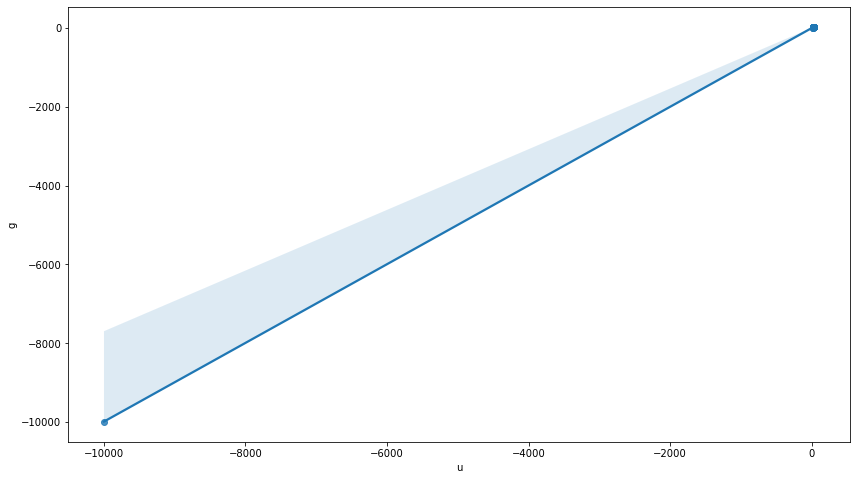

In [19]:
plt.figure(figsize=(14,8))
sns.regplot(df.u,df.g)

<AxesSubplot:xlabel='g', ylabel='z'>

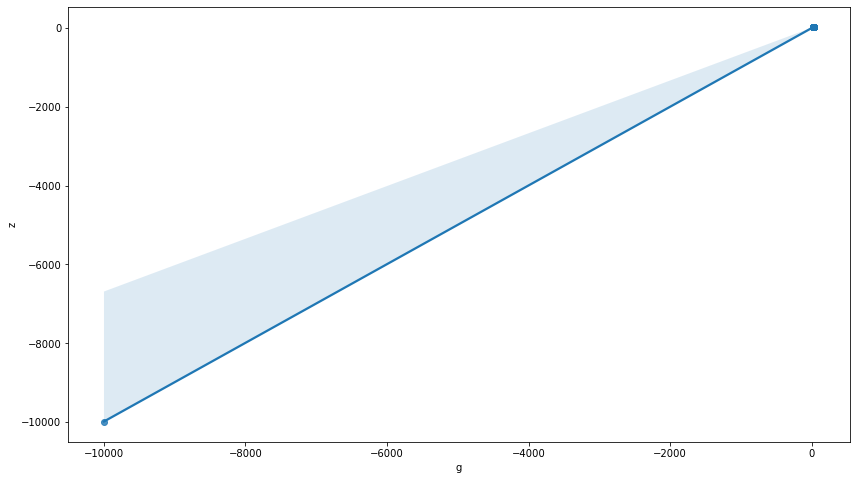

In [20]:
plt.figure(figsize=(14,8))
sns.regplot(df.g,df.z)

<AxesSubplot:xlabel='u', ylabel='z'>

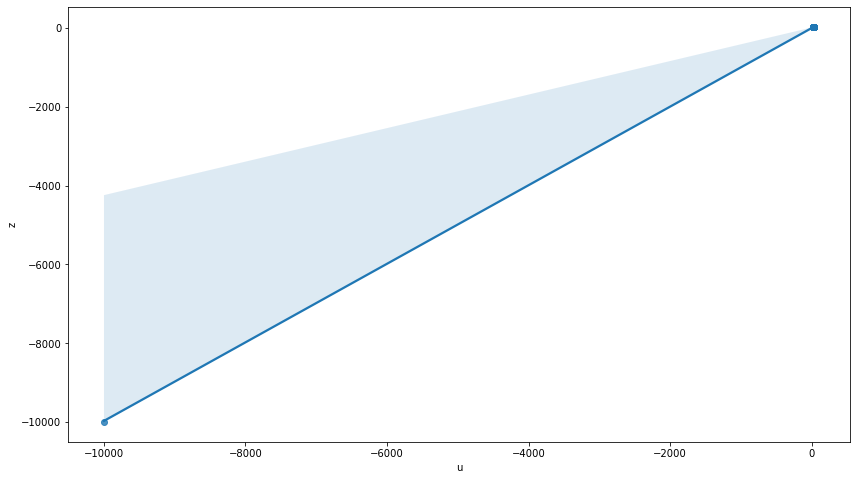

In [21]:
plt.figure(figsize=(14,8))
sns.regplot(df.u,df.z)

The features 'r' and 'i' seem to have very high positive correlation between each other due to their high Variance Inflation Factor values and the above regression fit proves that. Similarly, the feature 'u', 'g' and 'z' have really high positive correlation between themselves so it is quite obvious that any two features out of those three are redundant and need to be eliminated.

## Multivariate Analysis

<AxesSubplot:>

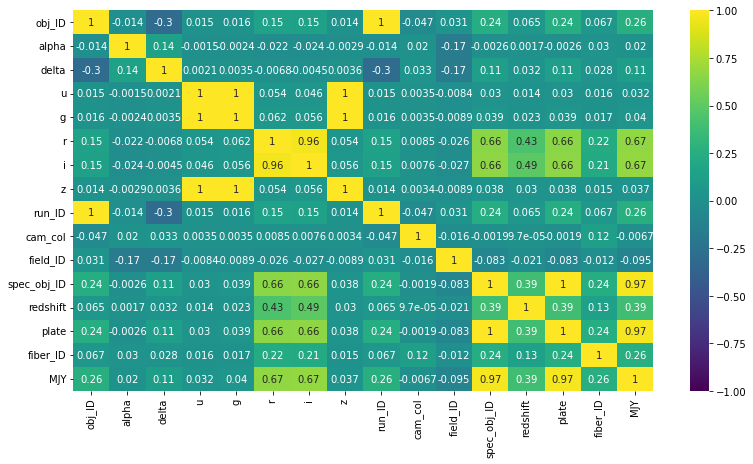

In [22]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

It is clearly evident from the above heatmap that there are several features which have perfect positive correlation between themselves so the issue of multicollinearity might arise as a result of that. Hence, these features need to be removed in order to prevent multicollinearity.

'u', 'g' and 'z' have perfect positive correlation among each other so only one of them is required for future analysis. So, I'm gonna drop 'g' and 'z' features.

In [23]:
df.drop(['g','z'],axis=1,inplace=True)

Likewise, the features 'plate' and 'spec_obj_ID' have perfect positive correlation between each other so one of them needs to be removed.

In [24]:
df.drop('spec_obj_ID',axis=1,inplace=True)

Moreover, there are two more features which are have highly significant positive correlation between each other, namely 'i' and 'r'. So, one of them must be dropped to avoid multicollinearity.

In [25]:
df.drop('i',axis=1,inplace=True)

The features 'run_ID' and 'obj_ID' have perfect positive correlation between each other so I'll be removing the 'obj_ID' column.

In [26]:
df.drop('obj_ID',axis=1,inplace=True)

### Plotting the heatmap once again after dropping the unnecessary features to examine the remaining features

<AxesSubplot:>

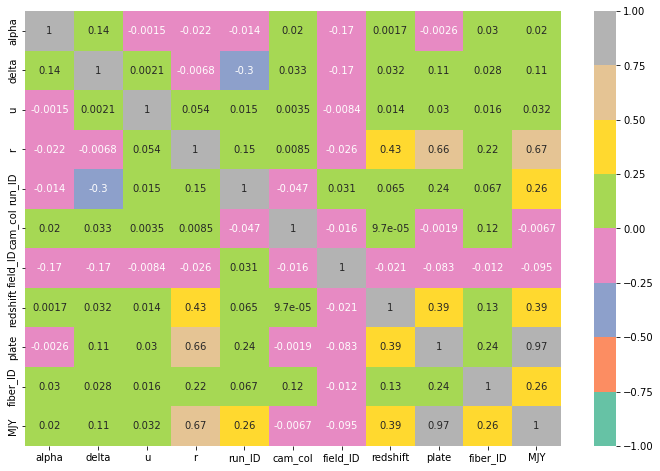

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Set2',vmin=-1,vmax=1)

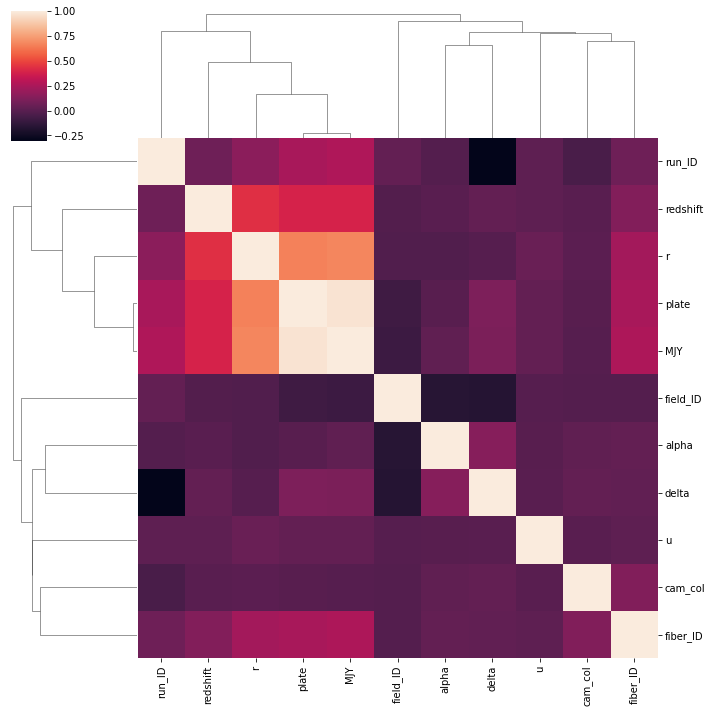

In [28]:
sns.clustermap(df.corr())

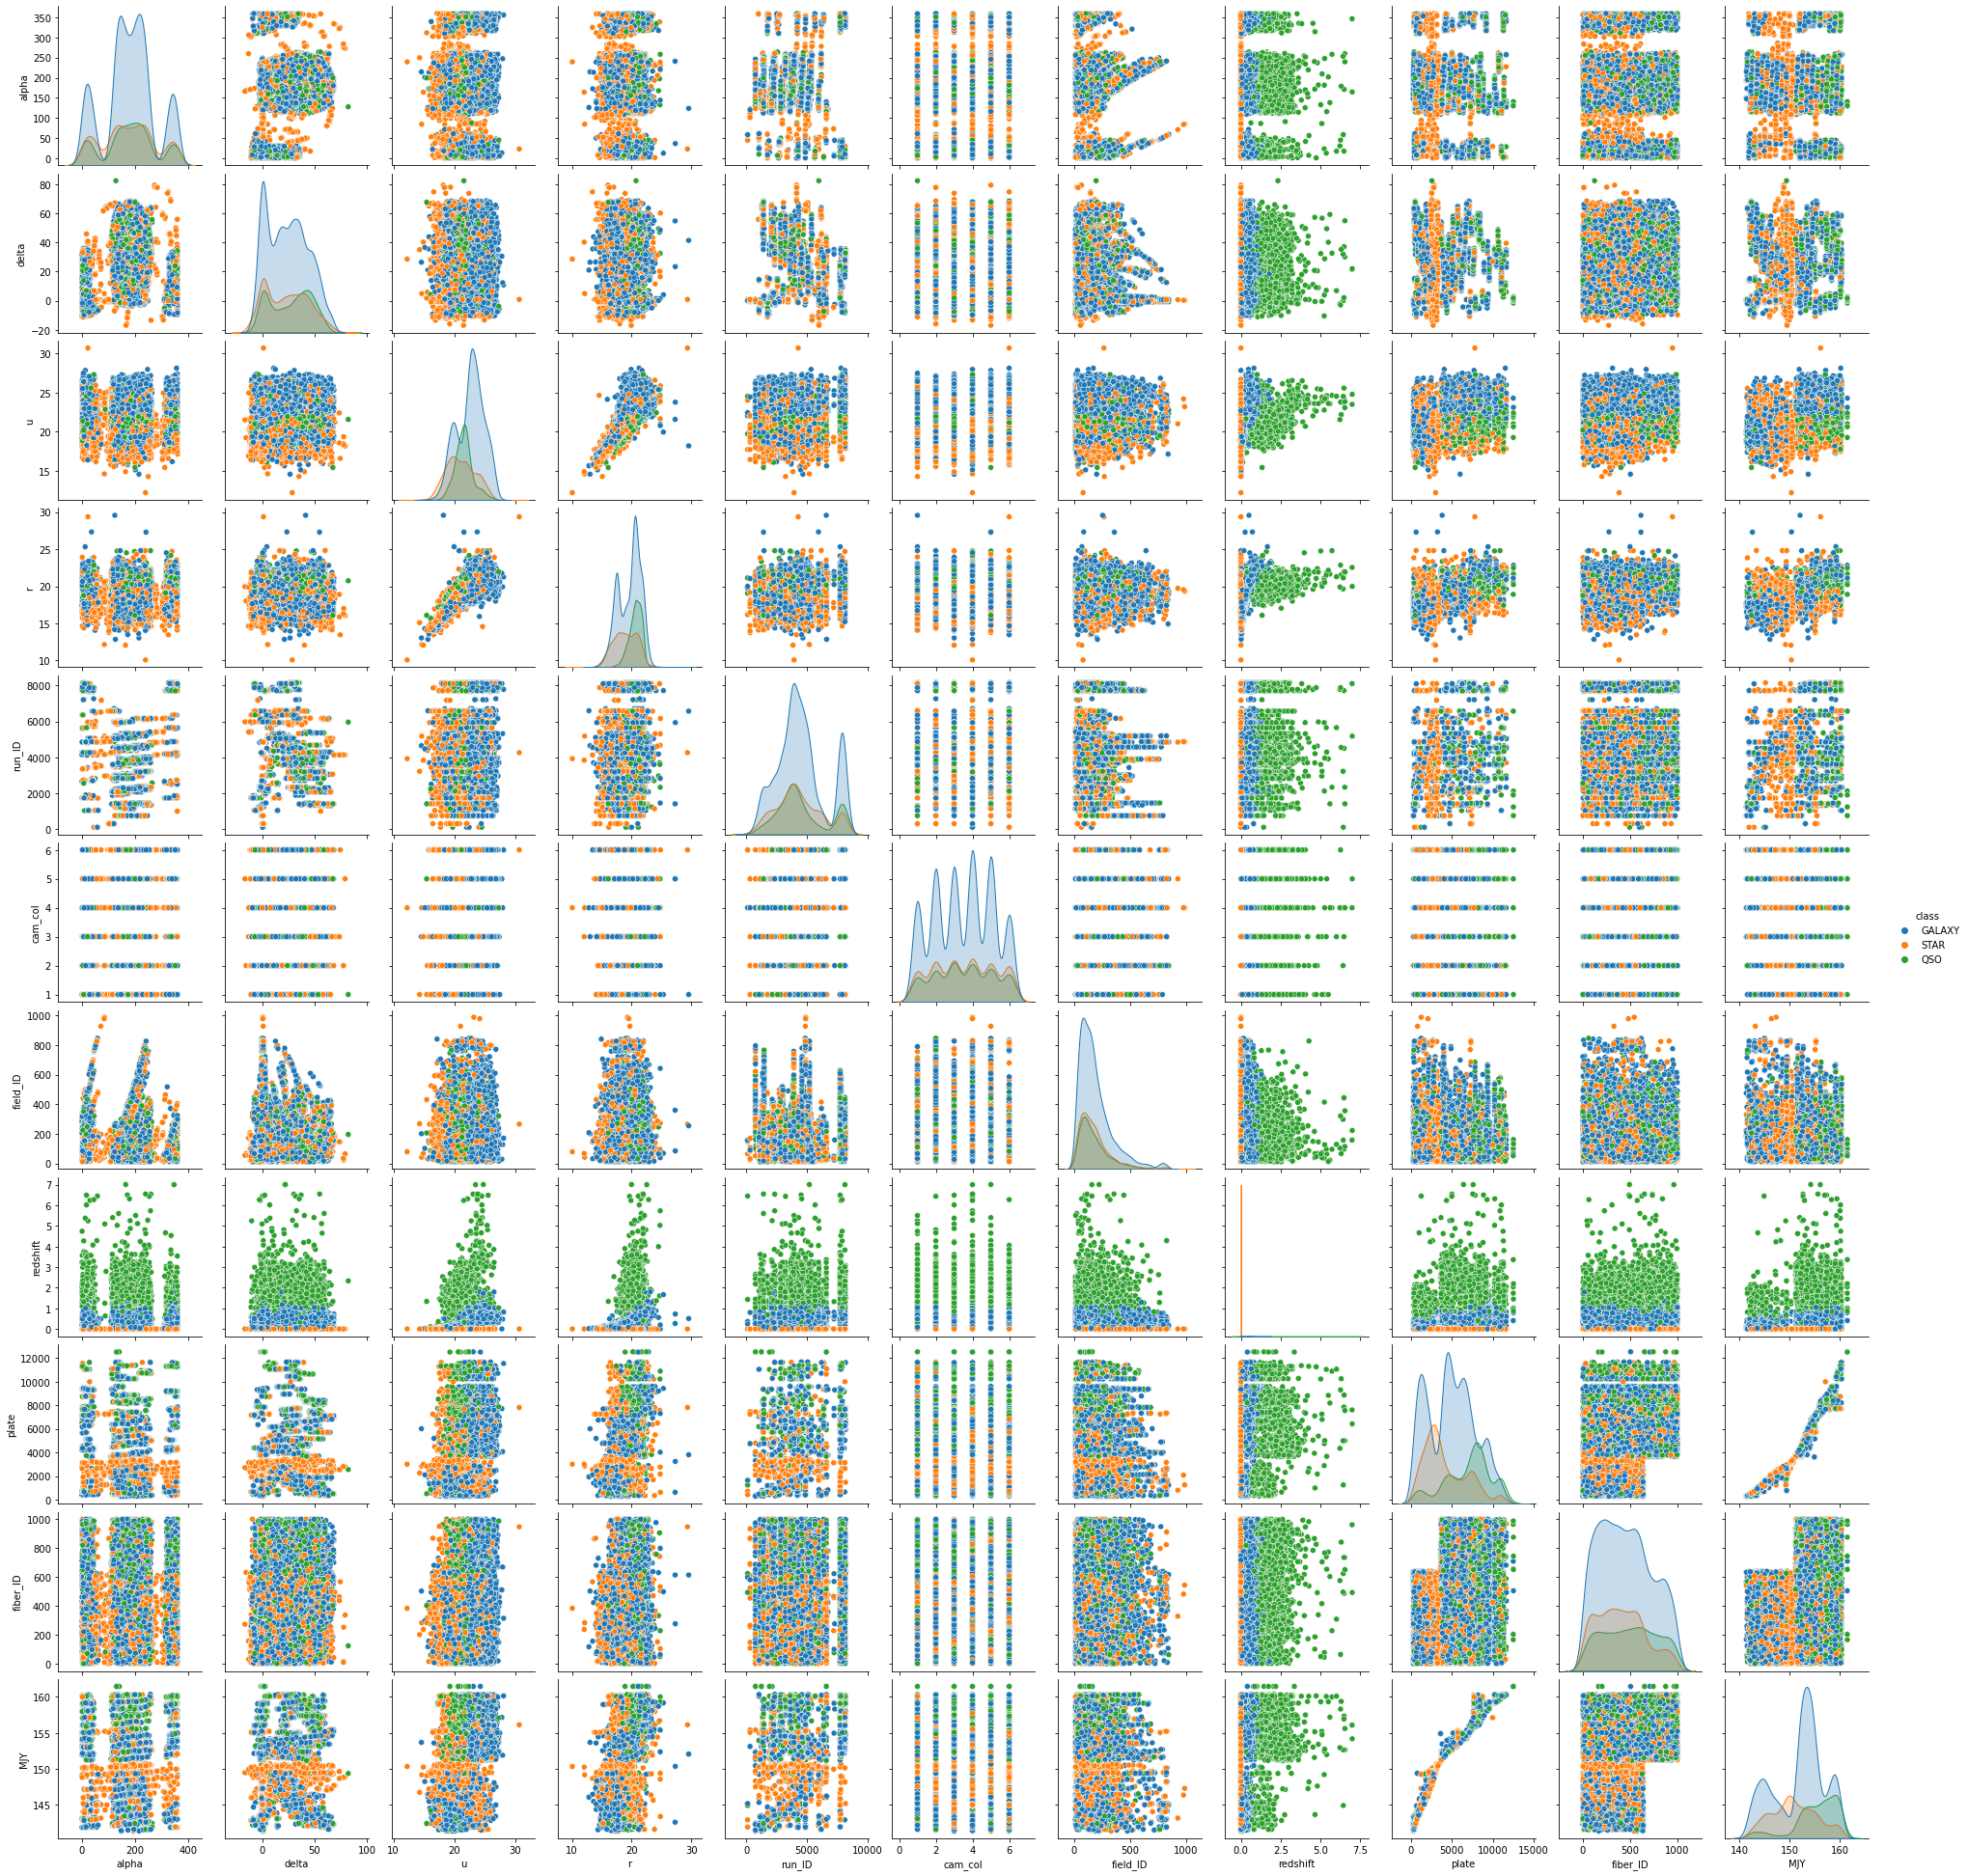

In [29]:
sns.pairplot(df.sample(n=10000),hue='class')

The distributions of most of the features follow the Gaussian distribution.

## Outlier Treatment

In [30]:
for col in df.drop('class',axis=1).columns:
    lower_limit, upper_limit = df[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

## Dividing the dataset into predictor features and the target label

In [31]:
X = df.drop('class',axis=1)
y = df['class']

## Imbalancing the target classes using Imbalanced learning's Synthetic Minority Oversampling TEchnique(SMOTE)

In [32]:
smote = SMOTE()
X,y_smote = smote.fit_resample(X,y)

In [33]:
print("Before SMOTE:",Counter(y))
print("After SMOTE:",Counter(y_smote))

Before SMOTE: Counter({'GALAXY': 59445, 'STAR': 21594, 'QSO': 18961})
After SMOTE: Counter({'GALAXY': 59445, 'QSO': 59445, 'STAR': 59445})


<AxesSubplot:xlabel='class', ylabel='count'>

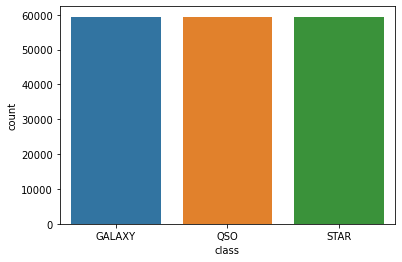

In [34]:
sns.countplot(y_smote)

## Feature Scaling

In [35]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

alpha  delta      u      r  run_ID  cam_col  field_ID  redshift  plate  \
0 -0.431  0.397  1.025  0.384  -0.437   -0.998    -0.793     0.065  0.148   
1 -0.337  0.335  1.460  1.628   0.026    0.956    -0.465     0.296  1.688   
2 -0.364  0.554  1.695  0.506  -0.437   -0.998    -0.457     0.080 -0.262   
3  1.653 -1.271  0.183  1.075  -0.140   -0.347     0.313     0.540  1.257   
4  1.720 -0.176 -1.123 -1.831   1.845   -0.347    -0.318    -0.763  0.251   

   fiber_ID    MJY  
0    -1.031  0.348  
1    -0.087  1.347  
2    -0.559 -0.074  
3     1.196  1.281  
4     1.443  0.255

## Splitting the dataset into training and test sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_smote, test_size=0.3, random_state=1)

## Model Training & Evaluation

In [37]:
logmodel = LogisticRegressionCV(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegressionCV(solver='liblinear')

[[16110  1634   173]
 [  727 16842     2]
 [    2     0 18011]]
              precision    recall  f1-score   support

      GALAXY       0.96      0.90      0.93     17917
         QSO       0.91      0.96      0.93     17571
        STAR       0.99      1.00      1.00     18013

    accuracy                           0.95     53501
   macro avg       0.95      0.95      0.95     53501
weighted avg       0.95      0.95      0.95     53501



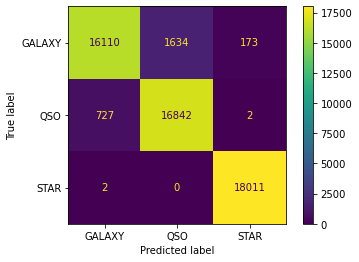

In [38]:
lr_pred = logmodel.predict(X_test)
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
plot_confusion_matrix(logmodel,X_test,y_test)

In [39]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [40]:
sgd_pred = sgd.predict(X_test)
print(classification_report(y_test,sgd_pred))

              precision    recall  f1-score   support

      GALAXY       0.94      0.85      0.89     17917
         QSO       0.90      0.96      0.93     17571
        STAR       0.96      0.98      0.97     18013

    accuracy                           0.93     53501
   macro avg       0.93      0.93      0.93     53501
weighted avg       0.93      0.93      0.93     53501



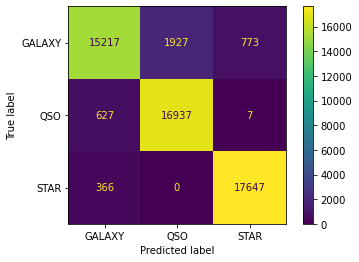

In [41]:
plot_confusion_matrix(sgd,X_test,y_test)

In [42]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

              precision    recall  f1-score   support

      GALAXY       0.82      0.73      0.77     17917
         QSO       0.79      0.97      0.87     17571
        STAR       0.98      0.87      0.92     18013

    accuracy                           0.86     53501
   macro avg       0.86      0.86      0.86     53501
weighted avg       0.87      0.86      0.86     53501



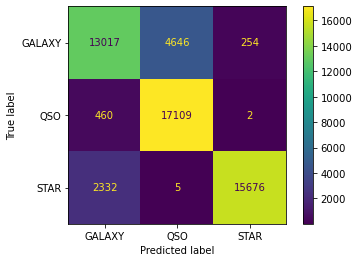

In [43]:
pac_pred = pac.predict(X_test)
print(classification_report(y_test,pac_pred))
plot_confusion_matrix(pac,X_test,y_test)

In [44]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

RidgeClassifier()

              precision    recall  f1-score   support

      GALAXY       0.76      0.56      0.65     17917
         QSO       0.90      0.93      0.91     17571
        STAR       0.69      0.85      0.76     18013

    accuracy                           0.78     53501
   macro avg       0.78      0.78      0.78     53501
weighted avg       0.78      0.78      0.77     53501



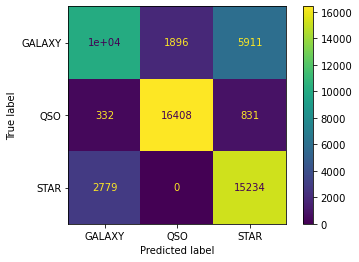

In [45]:
ridge_pred = ridge.predict(X_test)
print(classification_report(y_test,ridge_pred))
plot_confusion_matrix(ridge,X_test,y_test)

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

      GALAXY       0.91      0.91      0.91     17917
         QSO       0.97      0.95      0.96     17571
        STAR       0.94      0.95      0.95     18013

    accuracy                           0.94     53501
   macro avg       0.94      0.94      0.94     53501
weighted avg       0.94      0.94      0.94     53501



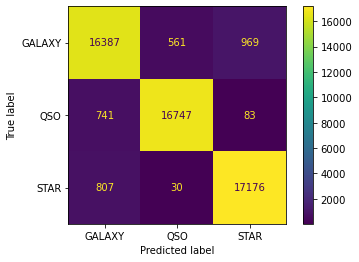

In [47]:
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))
plot_confusion_matrix(knn,X_test,y_test)

In [48]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

              precision    recall  f1-score   support

      GALAXY       0.95      0.96      0.95     17917
         QSO       0.98      0.94      0.96     17571
        STAR       0.97      1.00      0.99     18013

    accuracy                           0.97     53501
   macro avg       0.97      0.97      0.97     53501
weighted avg       0.97      0.97      0.97     53501



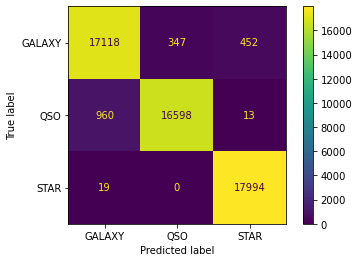

In [49]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))
plot_confusion_matrix(svm,X_test,y_test)

In [50]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

              precision    recall  f1-score   support

      GALAXY       0.89      0.89      0.89     17917
         QSO       0.89      0.90      0.90     17571
        STAR       0.99      0.99      0.99     18013

    accuracy                           0.93     53501
   macro avg       0.93      0.93      0.93     53501
weighted avg       0.93      0.93      0.93     53501



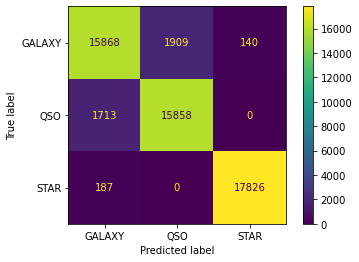

In [51]:
gnb_pred = gnb.predict(X_test)
print(classification_report(y_test,gnb_pred))
plot_confusion_matrix(gnb,X_test,y_test)

In [52]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

              precision    recall  f1-score   support

      GALAXY       0.45      0.39      0.42     17917
         QSO       0.79      0.81      0.80     17571
        STAR       0.62      0.68      0.65     18013

    accuracy                           0.63     53501
   macro avg       0.62      0.63      0.62     53501
weighted avg       0.62      0.63      0.62     53501



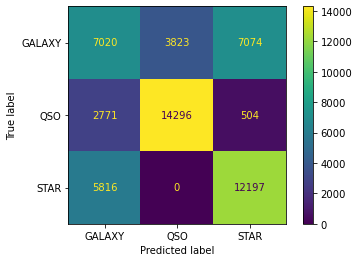

In [53]:
bnb_pred = bnb.predict(X_test)
print(classification_report(y_test,bnb_pred))
plot_confusion_matrix(bnb,X_test,y_test)

In [54]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

      GALAXY       0.95      0.95      0.95     17917
         QSO       0.95      0.95      0.95     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.97     53501
   macro avg       0.97      0.97      0.97     53501
weighted avg       0.97      0.97      0.97     53501



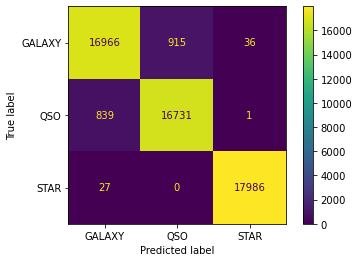

In [55]:
dtree_pred = dtree.predict(X_test)
print(classification_report(y_test,dtree_pred))
plot_confusion_matrix(dtree,X_test,y_test)

In [56]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

      GALAXY       0.96      0.98      0.97     17917
         QSO       0.98      0.96      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



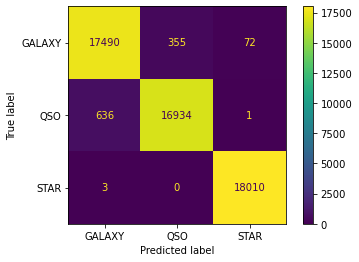

In [57]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
plot_confusion_matrix(rfc,X_test,y_test)

In [58]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

              precision    recall  f1-score   support

      GALAXY       0.50      0.98      0.66     17917
         QSO       0.39      0.01      0.02     17571
        STAR       0.99      1.00      1.00     18013

    accuracy                           0.67     53501
   macro avg       0.63      0.66      0.56     53501
weighted avg       0.63      0.67      0.56     53501



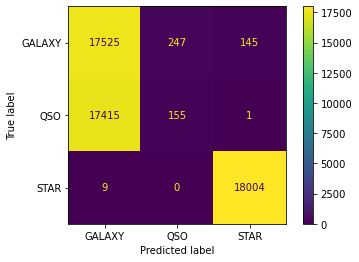

In [59]:
abc_pred = abc.predict(X_test)
print(classification_report(y_test,abc_pred))
plot_confusion_matrix(abc,X_test,y_test)

In [60]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

              precision    recall  f1-score   support

      GALAXY       0.96      0.98      0.97     17917
         QSO       0.98      0.96      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



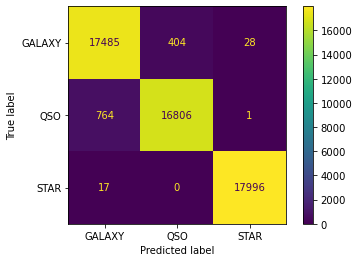

In [61]:
bag_pred = bag.predict(X_test)
print(classification_report(y_test,bag_pred))
plot_confusion_matrix(bag,X_test,y_test)

In [62]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

              precision    recall  f1-score   support

      GALAXY       0.96      0.98      0.97     17917
         QSO       0.98      0.96      0.97     17571
        STAR       0.99      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



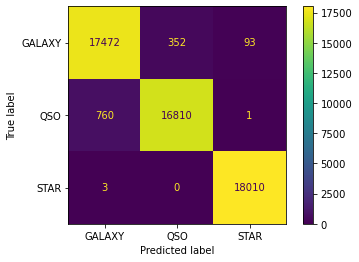

In [63]:
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test,gbc_pred))
plot_confusion_matrix(gbc,X_test,y_test)

In [64]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

              precision    recall  f1-score   support

      GALAXY       0.95      0.97      0.96     17917
         QSO       0.98      0.95      0.96     17571
        STAR       0.99      1.00      1.00     18013

    accuracy                           0.97     53501
   macro avg       0.97      0.97      0.97     53501
weighted avg       0.97      0.97      0.97     53501



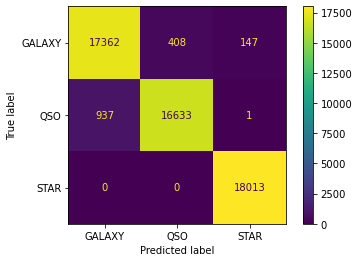

In [65]:
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test,xgb_pred))
plot_confusion_matrix(xgb,X_test,y_test)

In [66]:
hist = HistGradientBoostingClassifier()
hist.fit(X_train,y_train)

HistGradientBoostingClassifier()

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     17917
         QSO       0.98      0.97      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



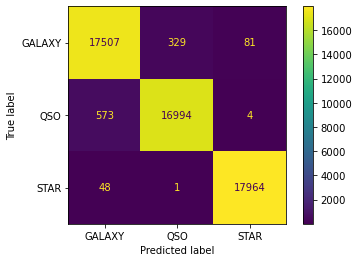

In [67]:
hist_pred = hist.predict(X_test)
print(classification_report(y_test,hist_pred))
plot_confusion_matrix(hist,X_test,y_test)

In [68]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

ExtraTreesClassifier()

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     17917
         QSO       0.98      0.97      0.98     17571
        STAR       0.99      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



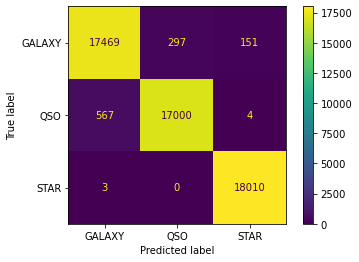

In [69]:
et_pred = et.predict(X_test)
print(classification_report(y_test,et_pred))
plot_confusion_matrix(et,X_test,y_test)

In [70]:
cat = CatBoostClassifier()
cat.fit(X_train,y_train)

Learning rate set to 0.101213
0:	learn: 0.9290148	total: 437ms	remaining: 7m 16s
1:	learn: 0.8014451	total: 496ms	remaining: 4m 7s
2:	learn: 0.7017483	total: 536ms	remaining: 2m 58s
3:	learn: 0.6222906	total: 570ms	remaining: 2m 22s
4:	learn: 0.5545098	total: 608ms	remaining: 2m
5:	learn: 0.4979482	total: 646ms	remaining: 1m 47s
6:	learn: 0.4506096	total: 681ms	remaining: 1m 36s
7:	learn: 0.4091823	total: 716ms	remaining: 1m 28s
8:	learn: 0.3739724	total: 749ms	remaining: 1m 22s
9:	learn: 0.3445253	total: 782ms	remaining: 1m 17s
10:	learn: 0.3179456	total: 818ms	remaining: 1m 13s
11:	learn: 0.2937171	total: 855ms	remaining: 1m 10s
12:	learn: 0.2732771	total: 892ms	remaining: 1m 7s
13:	learn: 0.2545576	total: 927ms	remaining: 1m 5s
14:	learn: 0.2385904	total: 964ms	remaining: 1m 3s
15:	learn: 0.2237480	total: 1s	remaining: 1m 1s
16:	learn: 0.2112677	total: 1.03s	remaining: 59.8s
17:	learn: 0.1995398	total: 1.07s	remaining: 58.4s
18:	learn: 0.1896421	total: 1.1s	remaining: 56.9s
19:	lear

160:	learn: 0.0649982	total: 9.03s	remaining: 47.1s
161:	learn: 0.0649626	total: 9.09s	remaining: 47s
162:	learn: 0.0647954	total: 9.15s	remaining: 47s
163:	learn: 0.0646490	total: 9.21s	remaining: 46.9s
164:	learn: 0.0646061	total: 9.27s	remaining: 46.9s
165:	learn: 0.0645018	total: 9.32s	remaining: 46.8s
166:	learn: 0.0644564	total: 9.38s	remaining: 46.8s
167:	learn: 0.0643099	total: 9.45s	remaining: 46.8s
168:	learn: 0.0642572	total: 9.5s	remaining: 46.7s
169:	learn: 0.0641284	total: 9.57s	remaining: 46.7s
170:	learn: 0.0640305	total: 9.63s	remaining: 46.7s
171:	learn: 0.0639634	total: 9.7s	remaining: 46.7s
172:	learn: 0.0638885	total: 9.77s	remaining: 46.7s
173:	learn: 0.0638589	total: 9.83s	remaining: 46.7s
174:	learn: 0.0637256	total: 9.89s	remaining: 46.7s
175:	learn: 0.0635761	total: 9.95s	remaining: 46.6s
176:	learn: 0.0635039	total: 10s	remaining: 46.5s
177:	learn: 0.0633481	total: 10.1s	remaining: 46.5s
178:	learn: 0.0632833	total: 10.1s	remaining: 46.5s
179:	learn: 0.063243

320:	learn: 0.0567841	total: 17.5s	remaining: 37.1s
321:	learn: 0.0567582	total: 17.6s	remaining: 37.1s
322:	learn: 0.0567162	total: 17.7s	remaining: 37s
323:	learn: 0.0566707	total: 17.7s	remaining: 37s
324:	learn: 0.0566558	total: 17.8s	remaining: 36.9s
325:	learn: 0.0566148	total: 17.8s	remaining: 36.9s
326:	learn: 0.0565788	total: 17.9s	remaining: 36.8s
327:	learn: 0.0565444	total: 17.9s	remaining: 36.8s
328:	learn: 0.0565169	total: 18s	remaining: 36.7s
329:	learn: 0.0564723	total: 18.1s	remaining: 36.7s
330:	learn: 0.0564379	total: 18.1s	remaining: 36.6s
331:	learn: 0.0564216	total: 18.2s	remaining: 36.6s
332:	learn: 0.0563436	total: 18.2s	remaining: 36.5s
333:	learn: 0.0563123	total: 18.3s	remaining: 36.5s
334:	learn: 0.0562705	total: 18.4s	remaining: 36.4s
335:	learn: 0.0562511	total: 18.4s	remaining: 36.4s
336:	learn: 0.0562325	total: 18.5s	remaining: 36.3s
337:	learn: 0.0562141	total: 18.5s	remaining: 36.3s
338:	learn: 0.0561637	total: 18.6s	remaining: 36.2s
339:	learn: 0.0561

481:	learn: 0.0522812	total: 25.8s	remaining: 27.7s
482:	learn: 0.0522541	total: 25.8s	remaining: 27.6s
483:	learn: 0.0522341	total: 25.9s	remaining: 27.6s
484:	learn: 0.0521897	total: 25.9s	remaining: 27.5s
485:	learn: 0.0521555	total: 26s	remaining: 27.5s
486:	learn: 0.0521286	total: 26s	remaining: 27.4s
487:	learn: 0.0521192	total: 26.1s	remaining: 27.4s
488:	learn: 0.0521081	total: 26.1s	remaining: 27.3s
489:	learn: 0.0520908	total: 26.2s	remaining: 27.3s
490:	learn: 0.0520750	total: 26.3s	remaining: 27.2s
491:	learn: 0.0520541	total: 26.3s	remaining: 27.2s
492:	learn: 0.0520393	total: 26.4s	remaining: 27.1s
493:	learn: 0.0520290	total: 26.4s	remaining: 27.1s
494:	learn: 0.0519835	total: 26.5s	remaining: 27s
495:	learn: 0.0519693	total: 26.6s	remaining: 27s
496:	learn: 0.0519395	total: 26.6s	remaining: 26.9s
497:	learn: 0.0519121	total: 26.7s	remaining: 26.9s
498:	learn: 0.0518891	total: 26.7s	remaining: 26.8s
499:	learn: 0.0518565	total: 26.8s	remaining: 26.8s
500:	learn: 0.051847

640:	learn: 0.0490183	total: 33.7s	remaining: 18.9s
641:	learn: 0.0489817	total: 33.7s	remaining: 18.8s
642:	learn: 0.0489600	total: 33.8s	remaining: 18.8s
643:	learn: 0.0489417	total: 33.8s	remaining: 18.7s
644:	learn: 0.0489249	total: 33.9s	remaining: 18.7s
645:	learn: 0.0489106	total: 34s	remaining: 18.6s
646:	learn: 0.0488922	total: 34s	remaining: 18.6s
647:	learn: 0.0488464	total: 34.1s	remaining: 18.5s
648:	learn: 0.0488113	total: 34.1s	remaining: 18.5s
649:	learn: 0.0487962	total: 34.2s	remaining: 18.4s
650:	learn: 0.0487829	total: 34.3s	remaining: 18.4s
651:	learn: 0.0487684	total: 34.3s	remaining: 18.3s
652:	learn: 0.0487428	total: 34.4s	remaining: 18.3s
653:	learn: 0.0487300	total: 34.4s	remaining: 18.2s
654:	learn: 0.0487223	total: 34.5s	remaining: 18.2s
655:	learn: 0.0487135	total: 34.5s	remaining: 18.1s
656:	learn: 0.0486935	total: 34.6s	remaining: 18.1s
657:	learn: 0.0486750	total: 34.6s	remaining: 18s
658:	learn: 0.0486632	total: 34.7s	remaining: 17.9s
659:	learn: 0.0486

803:	learn: 0.0461781	total: 43s	remaining: 10.5s
804:	learn: 0.0461750	total: 43s	remaining: 10.4s
805:	learn: 0.0461586	total: 43.1s	remaining: 10.4s
806:	learn: 0.0461343	total: 43.1s	remaining: 10.3s
807:	learn: 0.0461263	total: 43.2s	remaining: 10.3s
808:	learn: 0.0461157	total: 43.2s	remaining: 10.2s
809:	learn: 0.0460993	total: 43.3s	remaining: 10.2s
810:	learn: 0.0460811	total: 43.3s	remaining: 10.1s
811:	learn: 0.0460665	total: 43.4s	remaining: 10s
812:	learn: 0.0460336	total: 43.4s	remaining: 9.99s
813:	learn: 0.0460255	total: 43.5s	remaining: 9.94s
814:	learn: 0.0460072	total: 43.5s	remaining: 9.88s
815:	learn: 0.0459995	total: 43.6s	remaining: 9.83s
816:	learn: 0.0459927	total: 43.6s	remaining: 9.78s
817:	learn: 0.0459872	total: 43.7s	remaining: 9.72s
818:	learn: 0.0459767	total: 43.7s	remaining: 9.67s
819:	learn: 0.0459625	total: 43.8s	remaining: 9.61s
820:	learn: 0.0459412	total: 43.8s	remaining: 9.56s
821:	learn: 0.0459265	total: 43.9s	remaining: 9.5s
822:	learn: 0.04590

963:	learn: 0.0437953	total: 51.4s	remaining: 1.92s
964:	learn: 0.0437769	total: 51.5s	remaining: 1.87s
965:	learn: 0.0437611	total: 51.5s	remaining: 1.81s
966:	learn: 0.0437444	total: 51.5s	remaining: 1.76s
967:	learn: 0.0437389	total: 51.6s	remaining: 1.71s
968:	learn: 0.0437289	total: 51.6s	remaining: 1.65s
969:	learn: 0.0436991	total: 51.7s	remaining: 1.6s
970:	learn: 0.0436869	total: 51.7s	remaining: 1.54s
971:	learn: 0.0436693	total: 51.8s	remaining: 1.49s
972:	learn: 0.0436635	total: 51.8s	remaining: 1.44s
973:	learn: 0.0436508	total: 51.9s	remaining: 1.39s
974:	learn: 0.0436460	total: 52s	remaining: 1.33s
975:	learn: 0.0436349	total: 52s	remaining: 1.28s
976:	learn: 0.0436224	total: 52.1s	remaining: 1.23s
977:	learn: 0.0436016	total: 52.1s	remaining: 1.17s
978:	learn: 0.0435833	total: 52.2s	remaining: 1.12s
979:	learn: 0.0435696	total: 52.3s	remaining: 1.07s
980:	learn: 0.0435618	total: 52.3s	remaining: 1.01s
981:	learn: 0.0435365	total: 52.4s	remaining: 960ms
982:	learn: 0.043

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     17917
         QSO       0.98      0.97      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



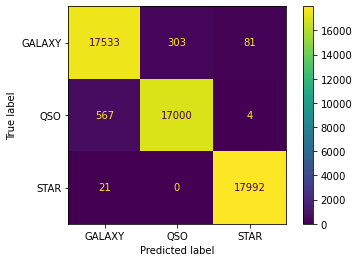

In [71]:
cat_pred = cat.predict(X_test)
print(classification_report(y_test,cat_pred))
plot_confusion_matrix(cat,X_test,y_test)

In [72]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     17917
         QSO       0.98      0.97      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



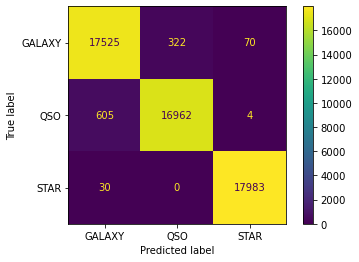

In [73]:
lgbm_pred = lgbm.predict(X_test)
print(classification_report(y_test,lgbm_pred))
plot_confusion_matrix(lgbm,X_test,y_test)

In [74]:
vc = VotingClassifier(estimators=[
    ('RF',RandomForestClassifier()),
    ('DT',DecisionTreeClassifier()),
    ('SVM',SVC()),
    ('XGB',XGBClassifier()),
    ('BAG',BaggingClassifier()),
    ('HIST',HistGradientBoostingClassifier()),
    ('GB',GradientBoostingClassifier()),
    ('LGBM',LGBMClassifier()),
    ('LR',LogisticRegressionCV(solver='liblinear')),
    ('ET',ExtraTreesClassifier())
],voting='hard')

In [75]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('DT', DecisionTreeClassifier()), ('SVM', SVC()),
                             ('XGB', XGBClassifier()),
                             ('BAG', BaggingClassifier()),
                             ('HIST', HistGradientBoostingClassifier()),
                             ('GB', GradientBoostingClassifier()),
                             ('LGBM', LGBMClassifier()),
                             ('LR', LogisticRegressionCV(solver='liblinear')),
                             ('ET', ExtraTreesClassifier())])

In [76]:
vc_pred = vc.predict(X_test)
print(classification_report(y_test,vc_pred))

              precision    recall  f1-score   support

      GALAXY       0.96      0.98      0.97     17917
         QSO       0.98      0.96      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



The best performing model is the Cat Boost Classifier which possesses an excellent prediction accuracy of more than 98%.

## Cross Validation

In [77]:
cv_dt = pd.DataFrame(cross_validate(dtree,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
cv_dt.head()

fit_time  score_time  test_accuracy  test_f1_weighted  \
0     0.887       0.170          0.966             0.966   
1     0.576       0.174          0.961             0.961   
2     1.195       0.404          0.961             0.961   
3     0.565       0.167          0.960             0.960   
4     0.592       0.169          0.963             0.963   

   test_recall_weighted  test_precision_weighted  
0                 0.966                    0.966  
1                 0.961                    0.961  
2                 0.961                    0.961  
3                 0.960                    0.960  
4                 0.963                    0.963

In [78]:
print("Mean Accuracy Score of Decision Tree Classifier:",str(np.round(cv_dt.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Decision Tree Classifier: 96.29%


In [79]:
cv_rf = pd.DataFrame(cross_val_score(rfc,X_test,y_test,scoring='accuracy',cv=RepeatedKFold(n_splits=6,n_repeats=3),verbose=1))
cv_rf.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  3.5min finished


0
0 0.976
1 0.978
2 0.977
3 0.978
4 0.978

In [80]:
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(cv_rf.mean()*100,2)) + '%')

Mean Accuracy Score of Random Forest Classifier: 0   97.650
dtype: float64%


In [81]:
cv_et = pd.DataFrame(cross_validate(et,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Extra Trees Classifier:",str(np.round(cv_et.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Extra Trees Classifier: 97.65%


In [82]:
cv_bag = pd.DataFrame(cross_validate(bag,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Bagging Classifier:",str(np.round(cv_bag.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Bagging Classifier: 97.46%


In [83]:
cv_xgb = pd.DataFrame(cross_validate(xgb,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of XG Boost Classifier:",str(np.round(cv_xgb.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of XG Boost Classifier: 97.18%


In [84]:
cv_cat = pd.DataFrame(cross_validate(cat,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cv_cat.test_accuracy.mean()*100,2)) + '%')

Learning rate set to 0.095836
0:	learn: 0.9385781	total: 14.4ms	remaining: 14.4s
1:	learn: 0.8148409	total: 28.1ms	remaining: 14s
2:	learn: 0.7185055	total: 41.5ms	remaining: 13.8s
3:	learn: 0.6398283	total: 54.6ms	remaining: 13.6s
4:	learn: 0.5724056	total: 70.4ms	remaining: 14s
5:	learn: 0.5144802	total: 86.7ms	remaining: 14.4s
6:	learn: 0.4660165	total: 103ms	remaining: 14.6s
7:	learn: 0.4249237	total: 116ms	remaining: 14.4s
8:	learn: 0.3895699	total: 129ms	remaining: 14.2s
9:	learn: 0.3580884	total: 141ms	remaining: 14s
10:	learn: 0.3308667	total: 154ms	remaining: 13.9s
11:	learn: 0.3073419	total: 167ms	remaining: 13.8s
12:	learn: 0.2858063	total: 180ms	remaining: 13.7s
13:	learn: 0.2665426	total: 196ms	remaining: 13.8s
14:	learn: 0.2493174	total: 210ms	remaining: 13.8s
15:	learn: 0.2348834	total: 225ms	remaining: 13.9s
16:	learn: 0.2221148	total: 238ms	remaining: 13.8s
17:	learn: 0.2097607	total: 251ms	remaining: 13.7s
18:	learn: 0.1987764	total: 266ms	remaining: 13.7s
19:	learn: 

163:	learn: 0.0667803	total: 2.93s	remaining: 15s
164:	learn: 0.0665929	total: 2.95s	remaining: 14.9s
165:	learn: 0.0663530	total: 2.96s	remaining: 14.9s
166:	learn: 0.0661256	total: 2.97s	remaining: 14.8s
167:	learn: 0.0659905	total: 2.99s	remaining: 14.8s
168:	learn: 0.0659422	total: 3s	remaining: 14.8s
169:	learn: 0.0659055	total: 3.01s	remaining: 14.7s
170:	learn: 0.0657933	total: 3.03s	remaining: 14.7s
171:	learn: 0.0657260	total: 3.04s	remaining: 14.6s
172:	learn: 0.0656854	total: 3.05s	remaining: 14.6s
173:	learn: 0.0656455	total: 3.06s	remaining: 14.5s
174:	learn: 0.0655796	total: 3.08s	remaining: 14.5s
175:	learn: 0.0655408	total: 3.09s	remaining: 14.5s
176:	learn: 0.0654546	total: 3.1s	remaining: 14.4s
177:	learn: 0.0653770	total: 3.11s	remaining: 14.4s
178:	learn: 0.0652626	total: 3.13s	remaining: 14.3s
179:	learn: 0.0651327	total: 3.14s	remaining: 14.3s
180:	learn: 0.0650932	total: 3.15s	remaining: 14.3s
181:	learn: 0.0650637	total: 3.16s	remaining: 14.2s
182:	learn: 0.0648

322:	learn: 0.0560389	total: 5.59s	remaining: 11.7s
323:	learn: 0.0560158	total: 5.61s	remaining: 11.7s
324:	learn: 0.0559570	total: 5.62s	remaining: 11.7s
325:	learn: 0.0559221	total: 5.63s	remaining: 11.6s
326:	learn: 0.0558655	total: 5.64s	remaining: 11.6s
327:	learn: 0.0558283	total: 5.66s	remaining: 11.6s
328:	learn: 0.0557807	total: 5.67s	remaining: 11.6s
329:	learn: 0.0556390	total: 5.68s	remaining: 11.5s
330:	learn: 0.0555674	total: 5.7s	remaining: 11.5s
331:	learn: 0.0555400	total: 5.71s	remaining: 11.5s
332:	learn: 0.0555047	total: 5.72s	remaining: 11.5s
333:	learn: 0.0554687	total: 5.73s	remaining: 11.4s
334:	learn: 0.0554531	total: 5.75s	remaining: 11.4s
335:	learn: 0.0554107	total: 5.76s	remaining: 11.4s
336:	learn: 0.0553820	total: 5.77s	remaining: 11.4s
337:	learn: 0.0553567	total: 5.78s	remaining: 11.3s
338:	learn: 0.0552549	total: 5.8s	remaining: 11.3s
339:	learn: 0.0552269	total: 5.81s	remaining: 11.3s
340:	learn: 0.0551989	total: 5.82s	remaining: 11.3s
341:	learn: 0.

483:	learn: 0.0496349	total: 8.54s	remaining: 9.11s
484:	learn: 0.0496244	total: 8.56s	remaining: 9.09s
485:	learn: 0.0496014	total: 8.59s	remaining: 9.08s
486:	learn: 0.0495715	total: 8.61s	remaining: 9.07s
487:	learn: 0.0495293	total: 8.63s	remaining: 9.05s
488:	learn: 0.0494949	total: 8.65s	remaining: 9.04s
489:	learn: 0.0494585	total: 8.68s	remaining: 9.03s
490:	learn: 0.0494433	total: 8.7s	remaining: 9.02s
491:	learn: 0.0494280	total: 8.72s	remaining: 9.01s
492:	learn: 0.0494019	total: 8.75s	remaining: 9s
493:	learn: 0.0493552	total: 8.77s	remaining: 8.99s
494:	learn: 0.0493255	total: 8.8s	remaining: 8.97s
495:	learn: 0.0492921	total: 8.82s	remaining: 8.96s
496:	learn: 0.0492710	total: 8.84s	remaining: 8.95s
497:	learn: 0.0492410	total: 8.87s	remaining: 8.94s
498:	learn: 0.0492106	total: 8.89s	remaining: 8.92s
499:	learn: 0.0491263	total: 8.91s	remaining: 8.91s
500:	learn: 0.0490416	total: 8.94s	remaining: 8.9s
501:	learn: 0.0490149	total: 8.96s	remaining: 8.89s
502:	learn: 0.0489

642:	learn: 0.0446007	total: 11s	remaining: 6.1s
643:	learn: 0.0445797	total: 11s	remaining: 6.08s
644:	learn: 0.0445480	total: 11s	remaining: 6.06s
645:	learn: 0.0445275	total: 11s	remaining: 6.04s
646:	learn: 0.0445151	total: 11s	remaining: 6.02s
647:	learn: 0.0444900	total: 11s	remaining: 6s
648:	learn: 0.0444468	total: 11.1s	remaining: 5.98s
649:	learn: 0.0444284	total: 11.1s	remaining: 5.96s
650:	learn: 0.0443999	total: 11.1s	remaining: 5.94s
651:	learn: 0.0443875	total: 11.1s	remaining: 5.93s
652:	learn: 0.0443659	total: 11.1s	remaining: 5.91s
653:	learn: 0.0443469	total: 11.2s	remaining: 5.9s
654:	learn: 0.0443037	total: 11.2s	remaining: 5.88s
655:	learn: 0.0442911	total: 11.2s	remaining: 5.87s
656:	learn: 0.0442712	total: 11.2s	remaining: 5.86s
657:	learn: 0.0442435	total: 11.2s	remaining: 5.84s
658:	learn: 0.0442283	total: 11.3s	remaining: 5.83s
659:	learn: 0.0442094	total: 11.3s	remaining: 5.82s
660:	learn: 0.0441862	total: 11.3s	remaining: 5.8s
661:	learn: 0.0441696	total: 1

804:	learn: 0.0405537	total: 14.7s	remaining: 3.57s
805:	learn: 0.0405384	total: 14.8s	remaining: 3.55s
806:	learn: 0.0405259	total: 14.8s	remaining: 3.53s
807:	learn: 0.0405089	total: 14.8s	remaining: 3.52s
808:	learn: 0.0404910	total: 14.8s	remaining: 3.5s
809:	learn: 0.0404496	total: 14.8s	remaining: 3.48s
810:	learn: 0.0404407	total: 14.9s	remaining: 3.46s
811:	learn: 0.0404247	total: 14.9s	remaining: 3.45s
812:	learn: 0.0404027	total: 14.9s	remaining: 3.43s
813:	learn: 0.0403944	total: 14.9s	remaining: 3.41s
814:	learn: 0.0403513	total: 15s	remaining: 3.4s
815:	learn: 0.0403458	total: 15s	remaining: 3.38s
816:	learn: 0.0403176	total: 15s	remaining: 3.36s
817:	learn: 0.0403113	total: 15s	remaining: 3.34s
818:	learn: 0.0402954	total: 15.1s	remaining: 3.33s
819:	learn: 0.0402781	total: 15.1s	remaining: 3.31s
820:	learn: 0.0402479	total: 15.1s	remaining: 3.29s
821:	learn: 0.0402252	total: 15.1s	remaining: 3.27s
822:	learn: 0.0402036	total: 15.1s	remaining: 3.26s
823:	learn: 0.0401495	

970:	learn: 0.0371395	total: 17.9s	remaining: 533ms
971:	learn: 0.0371246	total: 17.9s	remaining: 515ms
972:	learn: 0.0371021	total: 17.9s	remaining: 496ms
973:	learn: 0.0370896	total: 17.9s	remaining: 478ms
974:	learn: 0.0370776	total: 17.9s	remaining: 459ms
975:	learn: 0.0370151	total: 17.9s	remaining: 441ms
976:	learn: 0.0370054	total: 17.9s	remaining: 422ms
977:	learn: 0.0369806	total: 17.9s	remaining: 404ms
978:	learn: 0.0369630	total: 18s	remaining: 385ms
979:	learn: 0.0369429	total: 18s	remaining: 367ms
980:	learn: 0.0369361	total: 18s	remaining: 348ms
981:	learn: 0.0369163	total: 18s	remaining: 330ms
982:	learn: 0.0368761	total: 18s	remaining: 311ms
983:	learn: 0.0368593	total: 18s	remaining: 293ms
984:	learn: 0.0368462	total: 18s	remaining: 275ms
985:	learn: 0.0368320	total: 18s	remaining: 256ms
986:	learn: 0.0368270	total: 18.1s	remaining: 238ms
987:	learn: 0.0367872	total: 18.1s	remaining: 219ms
988:	learn: 0.0367612	total: 18.1s	remaining: 201ms
989:	learn: 0.0367407	total:

131:	learn: 0.0716253	total: 3.2s	remaining: 21s
132:	learn: 0.0715376	total: 3.22s	remaining: 21s
133:	learn: 0.0712542	total: 3.24s	remaining: 21s
134:	learn: 0.0711964	total: 3.27s	remaining: 20.9s
135:	learn: 0.0711161	total: 3.29s	remaining: 20.9s
136:	learn: 0.0710299	total: 3.31s	remaining: 20.8s
137:	learn: 0.0708828	total: 3.33s	remaining: 20.8s
138:	learn: 0.0708156	total: 3.35s	remaining: 20.8s
139:	learn: 0.0707548	total: 3.38s	remaining: 20.7s
140:	learn: 0.0706741	total: 3.4s	remaining: 20.7s
141:	learn: 0.0705984	total: 3.42s	remaining: 20.7s
142:	learn: 0.0703584	total: 3.45s	remaining: 20.7s
143:	learn: 0.0702399	total: 3.47s	remaining: 20.6s
144:	learn: 0.0701501	total: 3.49s	remaining: 20.6s
145:	learn: 0.0700718	total: 3.52s	remaining: 20.6s
146:	learn: 0.0700250	total: 3.54s	remaining: 20.5s
147:	learn: 0.0699234	total: 3.56s	remaining: 20.5s
148:	learn: 0.0695887	total: 3.58s	remaining: 20.5s
149:	learn: 0.0695441	total: 3.61s	remaining: 20.4s
150:	learn: 0.069314

290:	learn: 0.0586750	total: 5.7s	remaining: 13.9s
291:	learn: 0.0586449	total: 5.72s	remaining: 13.9s
292:	learn: 0.0586116	total: 5.73s	remaining: 13.8s
293:	learn: 0.0585816	total: 5.74s	remaining: 13.8s
294:	learn: 0.0584887	total: 5.75s	remaining: 13.7s
295:	learn: 0.0584547	total: 5.77s	remaining: 13.7s
296:	learn: 0.0584044	total: 5.78s	remaining: 13.7s
297:	learn: 0.0583438	total: 5.79s	remaining: 13.6s
298:	learn: 0.0582994	total: 5.8s	remaining: 13.6s
299:	learn: 0.0582696	total: 5.82s	remaining: 13.6s
300:	learn: 0.0582052	total: 5.84s	remaining: 13.6s
301:	learn: 0.0581820	total: 5.86s	remaining: 13.6s
302:	learn: 0.0581515	total: 5.89s	remaining: 13.5s
303:	learn: 0.0581306	total: 5.91s	remaining: 13.5s
304:	learn: 0.0581026	total: 5.93s	remaining: 13.5s
305:	learn: 0.0580670	total: 5.96s	remaining: 13.5s
306:	learn: 0.0578759	total: 5.98s	remaining: 13.5s
307:	learn: 0.0578374	total: 6s	remaining: 13.5s
308:	learn: 0.0578144	total: 6.02s	remaining: 13.5s
309:	learn: 0.057

449:	learn: 0.0512976	total: 9.11s	remaining: 11.1s
450:	learn: 0.0512801	total: 9.13s	remaining: 11.1s
451:	learn: 0.0512532	total: 9.14s	remaining: 11.1s
452:	learn: 0.0512265	total: 9.15s	remaining: 11.1s
453:	learn: 0.0511256	total: 9.16s	remaining: 11s
454:	learn: 0.0510678	total: 9.18s	remaining: 11s
455:	learn: 0.0510470	total: 9.19s	remaining: 11s
456:	learn: 0.0510219	total: 9.2s	remaining: 10.9s
457:	learn: 0.0509907	total: 9.21s	remaining: 10.9s
458:	learn: 0.0509712	total: 9.22s	remaining: 10.9s
459:	learn: 0.0509446	total: 9.23s	remaining: 10.8s
460:	learn: 0.0509206	total: 9.25s	remaining: 10.8s
461:	learn: 0.0509084	total: 9.26s	remaining: 10.8s
462:	learn: 0.0508694	total: 9.27s	remaining: 10.8s
463:	learn: 0.0508562	total: 9.28s	remaining: 10.7s
464:	learn: 0.0508007	total: 9.29s	remaining: 10.7s
465:	learn: 0.0507687	total: 9.31s	remaining: 10.7s
466:	learn: 0.0507370	total: 9.32s	remaining: 10.6s
467:	learn: 0.0506990	total: 9.33s	remaining: 10.6s
468:	learn: 0.05065

613:	learn: 0.0458238	total: 12.1s	remaining: 7.59s
614:	learn: 0.0457832	total: 12.1s	remaining: 7.57s
615:	learn: 0.0457658	total: 12.1s	remaining: 7.56s
616:	learn: 0.0457244	total: 12.2s	remaining: 7.54s
617:	learn: 0.0456948	total: 12.2s	remaining: 7.53s
618:	learn: 0.0456641	total: 12.2s	remaining: 7.51s
619:	learn: 0.0456463	total: 12.2s	remaining: 7.5s
620:	learn: 0.0456360	total: 12.3s	remaining: 7.48s
621:	learn: 0.0456158	total: 12.3s	remaining: 7.46s
622:	learn: 0.0456017	total: 12.3s	remaining: 7.45s
623:	learn: 0.0455598	total: 12.3s	remaining: 7.43s
624:	learn: 0.0455385	total: 12.4s	remaining: 7.41s
625:	learn: 0.0455015	total: 12.4s	remaining: 7.4s
626:	learn: 0.0454840	total: 12.4s	remaining: 7.38s
627:	learn: 0.0454060	total: 12.4s	remaining: 7.36s
628:	learn: 0.0453846	total: 12.5s	remaining: 7.35s
629:	learn: 0.0453618	total: 12.5s	remaining: 7.33s
630:	learn: 0.0453155	total: 12.5s	remaining: 7.32s
631:	learn: 0.0452980	total: 12.5s	remaining: 7.3s
632:	learn: 0.0

774:	learn: 0.0419684	total: 16.2s	remaining: 4.69s
775:	learn: 0.0419392	total: 16.2s	remaining: 4.67s
776:	learn: 0.0419224	total: 16.2s	remaining: 4.65s
777:	learn: 0.0418983	total: 16.2s	remaining: 4.63s
778:	learn: 0.0418763	total: 16.3s	remaining: 4.62s
779:	learn: 0.0418543	total: 16.3s	remaining: 4.6s
780:	learn: 0.0418303	total: 16.3s	remaining: 4.58s
781:	learn: 0.0418157	total: 16.3s	remaining: 4.56s
782:	learn: 0.0417650	total: 16.4s	remaining: 4.54s
783:	learn: 0.0417511	total: 16.4s	remaining: 4.52s
784:	learn: 0.0417242	total: 16.4s	remaining: 4.5s
785:	learn: 0.0417003	total: 16.4s	remaining: 4.48s
786:	learn: 0.0416660	total: 16.5s	remaining: 4.46s
787:	learn: 0.0416361	total: 16.5s	remaining: 4.44s
788:	learn: 0.0415877	total: 16.5s	remaining: 4.42s
789:	learn: 0.0415651	total: 16.5s	remaining: 4.4s
790:	learn: 0.0415481	total: 16.6s	remaining: 4.38s
791:	learn: 0.0415389	total: 16.6s	remaining: 4.36s
792:	learn: 0.0415076	total: 16.6s	remaining: 4.34s
793:	learn: 0.0

940:	learn: 0.0383760	total: 19.1s	remaining: 1.2s
941:	learn: 0.0383586	total: 19.1s	remaining: 1.18s
942:	learn: 0.0383392	total: 19.1s	remaining: 1.16s
943:	learn: 0.0383175	total: 19.1s	remaining: 1.13s
944:	learn: 0.0382929	total: 19.1s	remaining: 1.11s
945:	learn: 0.0382712	total: 19.2s	remaining: 1.09s
946:	learn: 0.0382486	total: 19.2s	remaining: 1.07s
947:	learn: 0.0382183	total: 19.2s	remaining: 1.05s
948:	learn: 0.0382059	total: 19.2s	remaining: 1.03s
949:	learn: 0.0381887	total: 19.2s	remaining: 1.01s
950:	learn: 0.0381776	total: 19.2s	remaining: 990ms
951:	learn: 0.0381618	total: 19.2s	remaining: 969ms
952:	learn: 0.0381414	total: 19.2s	remaining: 949ms
953:	learn: 0.0381242	total: 19.2s	remaining: 928ms
954:	learn: 0.0381042	total: 19.3s	remaining: 908ms
955:	learn: 0.0380737	total: 19.3s	remaining: 887ms
956:	learn: 0.0380546	total: 19.3s	remaining: 867ms
957:	learn: 0.0380331	total: 19.3s	remaining: 847ms
958:	learn: 0.0380093	total: 19.3s	remaining: 827ms
959:	learn: 0

108:	learn: 0.0744512	total: 1.4s	remaining: 11.5s
109:	learn: 0.0740456	total: 1.42s	remaining: 11.5s
110:	learn: 0.0738443	total: 1.43s	remaining: 11.4s
111:	learn: 0.0737682	total: 1.44s	remaining: 11.4s
112:	learn: 0.0735128	total: 1.45s	remaining: 11.4s
113:	learn: 0.0734161	total: 1.48s	remaining: 11.5s
114:	learn: 0.0733150	total: 1.5s	remaining: 11.5s
115:	learn: 0.0732392	total: 1.52s	remaining: 11.6s
116:	learn: 0.0731540	total: 1.54s	remaining: 11.6s
117:	learn: 0.0730328	total: 1.56s	remaining: 11.7s
118:	learn: 0.0729450	total: 1.58s	remaining: 11.7s
119:	learn: 0.0728498	total: 1.61s	remaining: 11.8s
120:	learn: 0.0727820	total: 1.63s	remaining: 11.9s
121:	learn: 0.0722328	total: 1.66s	remaining: 11.9s
122:	learn: 0.0720368	total: 1.68s	remaining: 12s
123:	learn: 0.0719386	total: 1.71s	remaining: 12s
124:	learn: 0.0718822	total: 1.73s	remaining: 12.1s
125:	learn: 0.0717750	total: 1.75s	remaining: 12.1s
126:	learn: 0.0715726	total: 1.77s	remaining: 12.2s
127:	learn: 0.0713

274:	learn: 0.0573244	total: 5.22s	remaining: 13.8s
275:	learn: 0.0572883	total: 5.24s	remaining: 13.7s
276:	learn: 0.0572416	total: 5.26s	remaining: 13.7s
277:	learn: 0.0571934	total: 5.28s	remaining: 13.7s
278:	learn: 0.0571315	total: 5.31s	remaining: 13.7s
279:	learn: 0.0570593	total: 5.33s	remaining: 13.7s
280:	learn: 0.0570120	total: 5.35s	remaining: 13.7s
281:	learn: 0.0569710	total: 5.38s	remaining: 13.7s
282:	learn: 0.0568347	total: 5.4s	remaining: 13.7s
283:	learn: 0.0568008	total: 5.43s	remaining: 13.7s
284:	learn: 0.0567802	total: 5.45s	remaining: 13.7s
285:	learn: 0.0567032	total: 5.47s	remaining: 13.7s
286:	learn: 0.0566640	total: 5.5s	remaining: 13.7s
287:	learn: 0.0565288	total: 5.52s	remaining: 13.7s
288:	learn: 0.0564792	total: 5.55s	remaining: 13.6s
289:	learn: 0.0564137	total: 5.57s	remaining: 13.6s
290:	learn: 0.0563789	total: 5.59s	remaining: 13.6s
291:	learn: 0.0563279	total: 5.61s	remaining: 13.6s
292:	learn: 0.0562918	total: 5.64s	remaining: 13.6s
293:	learn: 0.

444:	learn: 0.0492087	total: 8.3s	remaining: 10.4s
445:	learn: 0.0491940	total: 8.32s	remaining: 10.3s
446:	learn: 0.0491769	total: 8.33s	remaining: 10.3s
447:	learn: 0.0491640	total: 8.34s	remaining: 10.3s
448:	learn: 0.0490896	total: 8.36s	remaining: 10.3s
449:	learn: 0.0490766	total: 8.37s	remaining: 10.2s
450:	learn: 0.0490532	total: 8.38s	remaining: 10.2s
451:	learn: 0.0490030	total: 8.39s	remaining: 10.2s
452:	learn: 0.0489597	total: 8.4s	remaining: 10.1s
453:	learn: 0.0489070	total: 8.41s	remaining: 10.1s
454:	learn: 0.0488922	total: 8.43s	remaining: 10.1s
455:	learn: 0.0487953	total: 8.44s	remaining: 10.1s
456:	learn: 0.0487589	total: 8.45s	remaining: 10s
457:	learn: 0.0486633	total: 8.46s	remaining: 10s
458:	learn: 0.0486461	total: 8.48s	remaining: 9.99s
459:	learn: 0.0485494	total: 8.49s	remaining: 9.97s
460:	learn: 0.0485036	total: 8.51s	remaining: 9.95s
461:	learn: 0.0484915	total: 8.52s	remaining: 9.92s
462:	learn: 0.0484467	total: 8.53s	remaining: 9.89s
463:	learn: 0.0484

607:	learn: 0.0440792	total: 11.7s	remaining: 7.53s
608:	learn: 0.0440619	total: 11.7s	remaining: 7.51s
609:	learn: 0.0440478	total: 11.7s	remaining: 7.5s
610:	learn: 0.0440205	total: 11.7s	remaining: 7.48s
611:	learn: 0.0439999	total: 11.8s	remaining: 7.46s
612:	learn: 0.0439628	total: 11.8s	remaining: 7.44s
613:	learn: 0.0439199	total: 11.8s	remaining: 7.43s
614:	learn: 0.0439016	total: 11.8s	remaining: 7.41s
615:	learn: 0.0438894	total: 11.9s	remaining: 7.39s
616:	learn: 0.0438759	total: 11.9s	remaining: 7.38s
617:	learn: 0.0438461	total: 11.9s	remaining: 7.36s
618:	learn: 0.0438312	total: 11.9s	remaining: 7.35s
619:	learn: 0.0438135	total: 12s	remaining: 7.33s
620:	learn: 0.0437809	total: 12s	remaining: 7.31s
621:	learn: 0.0437663	total: 12s	remaining: 7.3s
622:	learn: 0.0437349	total: 12s	remaining: 7.28s
623:	learn: 0.0437010	total: 12.1s	remaining: 7.26s
624:	learn: 0.0436799	total: 12.1s	remaining: 7.25s
625:	learn: 0.0436566	total: 12.1s	remaining: 7.23s
626:	learn: 0.0436407	

778:	learn: 0.0397319	total: 14.6s	remaining: 4.13s
779:	learn: 0.0397133	total: 14.6s	remaining: 4.11s
780:	learn: 0.0396995	total: 14.6s	remaining: 4.09s
781:	learn: 0.0396874	total: 14.6s	remaining: 4.07s
782:	learn: 0.0396739	total: 14.6s	remaining: 4.05s
783:	learn: 0.0396598	total: 14.6s	remaining: 4.03s
784:	learn: 0.0396387	total: 14.6s	remaining: 4.01s
785:	learn: 0.0396095	total: 14.7s	remaining: 3.99s
786:	learn: 0.0395961	total: 14.7s	remaining: 3.97s
787:	learn: 0.0395690	total: 14.7s	remaining: 3.95s
788:	learn: 0.0395494	total: 14.7s	remaining: 3.93s
789:	learn: 0.0395143	total: 14.7s	remaining: 3.91s
790:	learn: 0.0394988	total: 14.7s	remaining: 3.89s
791:	learn: 0.0394617	total: 14.7s	remaining: 3.87s
792:	learn: 0.0394307	total: 14.7s	remaining: 3.85s
793:	learn: 0.0393984	total: 14.8s	remaining: 3.83s
794:	learn: 0.0393640	total: 14.8s	remaining: 3.81s
795:	learn: 0.0393294	total: 14.8s	remaining: 3.8s
796:	learn: 0.0393057	total: 14.8s	remaining: 3.78s
797:	learn: 0

941:	learn: 0.0362542	total: 18.2s	remaining: 1.12s
942:	learn: 0.0362403	total: 18.2s	remaining: 1.1s
943:	learn: 0.0362094	total: 18.2s	remaining: 1.08s
944:	learn: 0.0361985	total: 18.3s	remaining: 1.06s
945:	learn: 0.0361841	total: 18.3s	remaining: 1.04s
946:	learn: 0.0361666	total: 18.3s	remaining: 1.02s
947:	learn: 0.0361555	total: 18.3s	remaining: 1s
948:	learn: 0.0361269	total: 18.4s	remaining: 986ms
949:	learn: 0.0361011	total: 18.4s	remaining: 967ms
950:	learn: 0.0360802	total: 18.4s	remaining: 949ms
951:	learn: 0.0360555	total: 18.4s	remaining: 930ms
952:	learn: 0.0360439	total: 18.5s	remaining: 911ms
953:	learn: 0.0360310	total: 18.5s	remaining: 891ms
954:	learn: 0.0360119	total: 18.5s	remaining: 872ms
955:	learn: 0.0360015	total: 18.5s	remaining: 853ms
956:	learn: 0.0359918	total: 18.6s	remaining: 834ms
957:	learn: 0.0359264	total: 18.6s	remaining: 815ms
958:	learn: 0.0359023	total: 18.6s	remaining: 796ms
959:	learn: 0.0358778	total: 18.6s	remaining: 776ms
960:	learn: 0.03

104:	learn: 0.0742495	total: 1.65s	remaining: 14.1s
105:	learn: 0.0741367	total: 1.68s	remaining: 14.1s
106:	learn: 0.0739895	total: 1.7s	remaining: 14.2s
107:	learn: 0.0738762	total: 1.72s	remaining: 14.2s
108:	learn: 0.0737928	total: 1.74s	remaining: 14.3s
109:	learn: 0.0737412	total: 1.77s	remaining: 14.3s
110:	learn: 0.0734194	total: 1.79s	remaining: 14.3s
111:	learn: 0.0733588	total: 1.81s	remaining: 14.4s
112:	learn: 0.0732635	total: 1.83s	remaining: 14.4s
113:	learn: 0.0730531	total: 1.86s	remaining: 14.5s
114:	learn: 0.0726019	total: 1.89s	remaining: 14.5s
115:	learn: 0.0724331	total: 1.91s	remaining: 14.6s
116:	learn: 0.0723622	total: 1.94s	remaining: 14.6s
117:	learn: 0.0723042	total: 1.96s	remaining: 14.6s
118:	learn: 0.0721855	total: 1.98s	remaining: 14.7s
119:	learn: 0.0719367	total: 2.01s	remaining: 14.7s
120:	learn: 0.0718501	total: 2.03s	remaining: 14.7s
121:	learn: 0.0715397	total: 2.06s	remaining: 14.8s
122:	learn: 0.0714189	total: 2.08s	remaining: 14.8s
123:	learn: 0

268:	learn: 0.0571822	total: 5.44s	remaining: 14.8s
269:	learn: 0.0571330	total: 5.45s	remaining: 14.7s
270:	learn: 0.0570975	total: 5.46s	remaining: 14.7s
271:	learn: 0.0570270	total: 5.48s	remaining: 14.7s
272:	learn: 0.0569634	total: 5.49s	remaining: 14.6s
273:	learn: 0.0569108	total: 5.5s	remaining: 14.6s
274:	learn: 0.0568350	total: 5.51s	remaining: 14.5s
275:	learn: 0.0568052	total: 5.53s	remaining: 14.5s
276:	learn: 0.0567402	total: 5.54s	remaining: 14.5s
277:	learn: 0.0566820	total: 5.55s	remaining: 14.4s
278:	learn: 0.0566509	total: 5.56s	remaining: 14.4s
279:	learn: 0.0565950	total: 5.58s	remaining: 14.3s
280:	learn: 0.0565324	total: 5.59s	remaining: 14.3s
281:	learn: 0.0564867	total: 5.6s	remaining: 14.3s
282:	learn: 0.0564196	total: 5.62s	remaining: 14.2s
283:	learn: 0.0563662	total: 5.63s	remaining: 14.2s
284:	learn: 0.0563322	total: 5.64s	remaining: 14.2s
285:	learn: 0.0563027	total: 5.65s	remaining: 14.1s
286:	learn: 0.0562671	total: 5.66s	remaining: 14.1s
287:	learn: 0.

433:	learn: 0.0499296	total: 7.89s	remaining: 10.3s
434:	learn: 0.0498351	total: 7.92s	remaining: 10.3s
435:	learn: 0.0498210	total: 7.94s	remaining: 10.3s
436:	learn: 0.0497966	total: 7.97s	remaining: 10.3s
437:	learn: 0.0497821	total: 7.99s	remaining: 10.2s
438:	learn: 0.0497463	total: 8.01s	remaining: 10.2s
439:	learn: 0.0497345	total: 8.03s	remaining: 10.2s
440:	learn: 0.0497073	total: 8.06s	remaining: 10.2s
441:	learn: 0.0496751	total: 8.08s	remaining: 10.2s
442:	learn: 0.0496292	total: 8.1s	remaining: 10.2s
443:	learn: 0.0496099	total: 8.13s	remaining: 10.2s
444:	learn: 0.0495755	total: 8.15s	remaining: 10.2s
445:	learn: 0.0495628	total: 8.17s	remaining: 10.1s
446:	learn: 0.0495174	total: 8.19s	remaining: 10.1s
447:	learn: 0.0495089	total: 8.21s	remaining: 10.1s
448:	learn: 0.0494822	total: 8.24s	remaining: 10.1s
449:	learn: 0.0494310	total: 8.26s	remaining: 10.1s
450:	learn: 0.0493638	total: 8.29s	remaining: 10.1s
451:	learn: 0.0493027	total: 8.31s	remaining: 10.1s
452:	learn: 0

607:	learn: 0.0441145	total: 11.7s	remaining: 7.53s
608:	learn: 0.0441015	total: 11.7s	remaining: 7.51s
609:	learn: 0.0440911	total: 11.7s	remaining: 7.49s
610:	learn: 0.0440620	total: 11.7s	remaining: 7.46s
611:	learn: 0.0440429	total: 11.7s	remaining: 7.44s
612:	learn: 0.0440225	total: 11.7s	remaining: 7.42s
613:	learn: 0.0439919	total: 11.8s	remaining: 7.39s
614:	learn: 0.0439649	total: 11.8s	remaining: 7.37s
615:	learn: 0.0439101	total: 11.8s	remaining: 7.34s
616:	learn: 0.0438911	total: 11.8s	remaining: 7.32s
617:	learn: 0.0438816	total: 11.8s	remaining: 7.3s
618:	learn: 0.0438542	total: 11.8s	remaining: 7.27s
619:	learn: 0.0438369	total: 11.8s	remaining: 7.25s
620:	learn: 0.0438082	total: 11.8s	remaining: 7.23s
621:	learn: 0.0437868	total: 11.9s	remaining: 7.2s
622:	learn: 0.0437396	total: 11.9s	remaining: 7.18s
623:	learn: 0.0437164	total: 11.9s	remaining: 7.16s
624:	learn: 0.0436971	total: 11.9s	remaining: 7.13s
625:	learn: 0.0436801	total: 11.9s	remaining: 7.11s
626:	learn: 0.

771:	learn: 0.0401891	total: 14.3s	remaining: 4.23s
772:	learn: 0.0401566	total: 14.4s	remaining: 4.21s
773:	learn: 0.0401404	total: 14.4s	remaining: 4.2s
774:	learn: 0.0401255	total: 14.4s	remaining: 4.18s
775:	learn: 0.0401048	total: 14.4s	remaining: 4.16s
776:	learn: 0.0400873	total: 14.4s	remaining: 4.15s
777:	learn: 0.0400760	total: 14.5s	remaining: 4.13s
778:	learn: 0.0400560	total: 14.5s	remaining: 4.11s
779:	learn: 0.0400268	total: 14.5s	remaining: 4.09s
780:	learn: 0.0399973	total: 14.5s	remaining: 4.08s
781:	learn: 0.0399717	total: 14.6s	remaining: 4.06s
782:	learn: 0.0399500	total: 14.6s	remaining: 4.04s
783:	learn: 0.0399400	total: 14.6s	remaining: 4.03s
784:	learn: 0.0399088	total: 14.6s	remaining: 4.01s
785:	learn: 0.0398586	total: 14.7s	remaining: 3.99s
786:	learn: 0.0398455	total: 14.7s	remaining: 3.97s
787:	learn: 0.0398356	total: 14.7s	remaining: 3.96s
788:	learn: 0.0398079	total: 14.7s	remaining: 3.94s
789:	learn: 0.0397803	total: 14.8s	remaining: 3.92s
790:	learn: 0

931:	learn: 0.0367039	total: 17.7s	remaining: 1.29s
932:	learn: 0.0366815	total: 17.8s	remaining: 1.27s
933:	learn: 0.0366670	total: 17.8s	remaining: 1.26s
934:	learn: 0.0366507	total: 17.8s	remaining: 1.24s
935:	learn: 0.0366360	total: 17.8s	remaining: 1.22s
936:	learn: 0.0366010	total: 17.8s	remaining: 1.2s
937:	learn: 0.0365944	total: 17.8s	remaining: 1.18s
938:	learn: 0.0365773	total: 17.8s	remaining: 1.16s
939:	learn: 0.0365505	total: 17.8s	remaining: 1.14s
940:	learn: 0.0365276	total: 17.9s	remaining: 1.12s
941:	learn: 0.0365145	total: 17.9s	remaining: 1.1s
942:	learn: 0.0364955	total: 17.9s	remaining: 1.08s
943:	learn: 0.0364664	total: 17.9s	remaining: 1.06s
944:	learn: 0.0364440	total: 17.9s	remaining: 1.04s
945:	learn: 0.0364118	total: 17.9s	remaining: 1.02s
946:	learn: 0.0363888	total: 17.9s	remaining: 1s
947:	learn: 0.0363746	total: 17.9s	remaining: 984ms
948:	learn: 0.0363569	total: 18s	remaining: 965ms
949:	learn: 0.0363444	total: 18s	remaining: 946ms
950:	learn: 0.0363312

95:	learn: 0.0768536	total: 2.35s	remaining: 22.1s
96:	learn: 0.0767866	total: 2.37s	remaining: 22.1s
97:	learn: 0.0764507	total: 2.4s	remaining: 22s
98:	learn: 0.0763816	total: 2.42s	remaining: 22s
99:	learn: 0.0762506	total: 2.44s	remaining: 22s
100:	learn: 0.0761969	total: 2.46s	remaining: 21.9s
101:	learn: 0.0760816	total: 2.48s	remaining: 21.9s
102:	learn: 0.0757439	total: 2.51s	remaining: 21.8s
103:	learn: 0.0756179	total: 2.53s	remaining: 21.8s
104:	learn: 0.0755714	total: 2.55s	remaining: 21.7s
105:	learn: 0.0754883	total: 2.58s	remaining: 21.7s
106:	learn: 0.0754200	total: 2.6s	remaining: 21.7s
107:	learn: 0.0753336	total: 2.62s	remaining: 21.7s
108:	learn: 0.0752247	total: 2.65s	remaining: 21.6s
109:	learn: 0.0751387	total: 2.67s	remaining: 21.6s
110:	learn: 0.0748279	total: 2.69s	remaining: 21.6s
111:	learn: 0.0747111	total: 2.71s	remaining: 21.5s
112:	learn: 0.0742910	total: 2.74s	remaining: 21.5s
113:	learn: 0.0738063	total: 2.76s	remaining: 21.5s
114:	learn: 0.0736548	tot

257:	learn: 0.0582941	total: 4.81s	remaining: 13.8s
258:	learn: 0.0582394	total: 4.83s	remaining: 13.8s
259:	learn: 0.0581950	total: 4.86s	remaining: 13.8s
260:	learn: 0.0581611	total: 4.88s	remaining: 13.8s
261:	learn: 0.0581016	total: 4.9s	remaining: 13.8s
262:	learn: 0.0579516	total: 4.92s	remaining: 13.8s
263:	learn: 0.0579134	total: 4.95s	remaining: 13.8s
264:	learn: 0.0578630	total: 4.97s	remaining: 13.8s
265:	learn: 0.0577767	total: 4.99s	remaining: 13.8s
266:	learn: 0.0577298	total: 5.02s	remaining: 13.8s
267:	learn: 0.0576743	total: 5.04s	remaining: 13.8s
268:	learn: 0.0576294	total: 5.06s	remaining: 13.8s
269:	learn: 0.0575892	total: 5.08s	remaining: 13.7s
270:	learn: 0.0575291	total: 5.11s	remaining: 13.7s
271:	learn: 0.0574873	total: 5.13s	remaining: 13.7s
272:	learn: 0.0573992	total: 5.15s	remaining: 13.7s
273:	learn: 0.0573714	total: 5.17s	remaining: 13.7s
274:	learn: 0.0573375	total: 5.2s	remaining: 13.7s
275:	learn: 0.0572905	total: 5.22s	remaining: 13.7s
276:	learn: 0.

422:	learn: 0.0508315	total: 8.61s	remaining: 11.8s
423:	learn: 0.0508126	total: 8.64s	remaining: 11.7s
424:	learn: 0.0507801	total: 8.66s	remaining: 11.7s
425:	learn: 0.0507592	total: 8.68s	remaining: 11.7s
426:	learn: 0.0507435	total: 8.71s	remaining: 11.7s
427:	learn: 0.0506904	total: 8.73s	remaining: 11.7s
428:	learn: 0.0506488	total: 8.75s	remaining: 11.6s
429:	learn: 0.0506233	total: 8.77s	remaining: 11.6s
430:	learn: 0.0505837	total: 8.79s	remaining: 11.6s
431:	learn: 0.0505617	total: 8.82s	remaining: 11.6s
432:	learn: 0.0505176	total: 8.84s	remaining: 11.6s
433:	learn: 0.0504725	total: 8.86s	remaining: 11.6s
434:	learn: 0.0504495	total: 8.89s	remaining: 11.5s
435:	learn: 0.0503559	total: 8.91s	remaining: 11.5s
436:	learn: 0.0503273	total: 8.93s	remaining: 11.5s
437:	learn: 0.0502797	total: 8.96s	remaining: 11.5s
438:	learn: 0.0502421	total: 8.98s	remaining: 11.5s
439:	learn: 0.0501267	total: 8.99s	remaining: 11.4s
440:	learn: 0.0500919	total: 9.01s	remaining: 11.4s
441:	learn: 

583:	learn: 0.0455468	total: 11s	remaining: 7.87s
584:	learn: 0.0454713	total: 11.1s	remaining: 7.86s
585:	learn: 0.0454573	total: 11.1s	remaining: 7.84s
586:	learn: 0.0454002	total: 11.1s	remaining: 7.82s
587:	learn: 0.0453777	total: 11.1s	remaining: 7.81s
588:	learn: 0.0453608	total: 11.2s	remaining: 7.79s
589:	learn: 0.0453452	total: 11.2s	remaining: 7.77s
590:	learn: 0.0452676	total: 11.2s	remaining: 7.76s
591:	learn: 0.0452378	total: 11.2s	remaining: 7.74s
592:	learn: 0.0451983	total: 11.3s	remaining: 7.73s
593:	learn: 0.0451498	total: 11.3s	remaining: 7.71s
594:	learn: 0.0451189	total: 11.3s	remaining: 7.7s
595:	learn: 0.0450899	total: 11.3s	remaining: 7.68s
596:	learn: 0.0450643	total: 11.4s	remaining: 7.67s
597:	learn: 0.0450434	total: 11.4s	remaining: 7.65s
598:	learn: 0.0450148	total: 11.4s	remaining: 7.63s
599:	learn: 0.0449986	total: 11.4s	remaining: 7.61s
600:	learn: 0.0449665	total: 11.4s	remaining: 7.6s
601:	learn: 0.0449512	total: 11.5s	remaining: 7.58s
602:	learn: 0.04

744:	learn: 0.0410581	total: 14.9s	remaining: 5.11s
745:	learn: 0.0410383	total: 15s	remaining: 5.1s
746:	learn: 0.0409927	total: 15s	remaining: 5.08s
747:	learn: 0.0409833	total: 15s	remaining: 5.06s
748:	learn: 0.0409485	total: 15s	remaining: 5.04s
749:	learn: 0.0409358	total: 15.1s	remaining: 5.02s
750:	learn: 0.0409180	total: 15.1s	remaining: 5s
751:	learn: 0.0409041	total: 15.1s	remaining: 4.98s
752:	learn: 0.0408547	total: 15.1s	remaining: 4.96s
753:	learn: 0.0408340	total: 15.2s	remaining: 4.94s
754:	learn: 0.0407715	total: 15.2s	remaining: 4.92s
755:	learn: 0.0407545	total: 15.2s	remaining: 4.91s
756:	learn: 0.0407354	total: 15.2s	remaining: 4.89s
757:	learn: 0.0407088	total: 15.3s	remaining: 4.87s
758:	learn: 0.0406839	total: 15.3s	remaining: 4.86s
759:	learn: 0.0406456	total: 15.3s	remaining: 4.84s
760:	learn: 0.0406029	total: 15.4s	remaining: 4.83s
761:	learn: 0.0405794	total: 15.4s	remaining: 4.81s
762:	learn: 0.0405513	total: 15.4s	remaining: 4.79s
763:	learn: 0.0405273	to

911:	learn: 0.0372260	total: 17.8s	remaining: 1.72s
912:	learn: 0.0372129	total: 17.8s	remaining: 1.7s
913:	learn: 0.0372041	total: 17.9s	remaining: 1.68s
914:	learn: 0.0371928	total: 17.9s	remaining: 1.66s
915:	learn: 0.0371838	total: 17.9s	remaining: 1.64s
916:	learn: 0.0371723	total: 17.9s	remaining: 1.62s
917:	learn: 0.0371603	total: 17.9s	remaining: 1.6s
918:	learn: 0.0371400	total: 18s	remaining: 1.58s
919:	learn: 0.0371249	total: 18s	remaining: 1.56s
920:	learn: 0.0371113	total: 18s	remaining: 1.54s
921:	learn: 0.0370862	total: 18s	remaining: 1.52s
922:	learn: 0.0370791	total: 18.1s	remaining: 1.51s
923:	learn: 0.0370547	total: 18.1s	remaining: 1.49s
924:	learn: 0.0370402	total: 18.1s	remaining: 1.47s
925:	learn: 0.0370289	total: 18.1s	remaining: 1.45s
926:	learn: 0.0370073	total: 18.1s	remaining: 1.43s
927:	learn: 0.0369941	total: 18.2s	remaining: 1.41s
928:	learn: 0.0369379	total: 18.2s	remaining: 1.39s
929:	learn: 0.0369234	total: 18.2s	remaining: 1.37s
930:	learn: 0.0369098	

85:	learn: 0.0763565	total: 1.2s	remaining: 12.7s
86:	learn: 0.0762751	total: 1.21s	remaining: 12.7s
87:	learn: 0.0760492	total: 1.22s	remaining: 12.7s
88:	learn: 0.0757105	total: 1.24s	remaining: 12.7s
89:	learn: 0.0752140	total: 1.25s	remaining: 12.7s
90:	learn: 0.0750841	total: 1.27s	remaining: 12.7s
91:	learn: 0.0747401	total: 1.28s	remaining: 12.7s
92:	learn: 0.0744025	total: 1.3s	remaining: 12.7s
93:	learn: 0.0741103	total: 1.31s	remaining: 12.7s
94:	learn: 0.0739991	total: 1.33s	remaining: 12.7s
95:	learn: 0.0736067	total: 1.34s	remaining: 12.7s
96:	learn: 0.0735353	total: 1.36s	remaining: 12.6s
97:	learn: 0.0733339	total: 1.37s	remaining: 12.6s
98:	learn: 0.0729147	total: 1.38s	remaining: 12.6s
99:	learn: 0.0725722	total: 1.4s	remaining: 12.6s
100:	learn: 0.0724800	total: 1.41s	remaining: 12.6s
101:	learn: 0.0724277	total: 1.42s	remaining: 12.5s
102:	learn: 0.0722840	total: 1.44s	remaining: 12.5s
103:	learn: 0.0721174	total: 1.45s	remaining: 12.5s
104:	learn: 0.0720354	total: 1

249:	learn: 0.0577124	total: 4.64s	remaining: 13.9s
250:	learn: 0.0576560	total: 4.67s	remaining: 13.9s
251:	learn: 0.0576316	total: 4.72s	remaining: 14s
252:	learn: 0.0575923	total: 4.75s	remaining: 14s
253:	learn: 0.0575641	total: 4.78s	remaining: 14s
254:	learn: 0.0575358	total: 4.8s	remaining: 14s
255:	learn: 0.0575105	total: 4.82s	remaining: 14s
256:	learn: 0.0574621	total: 4.85s	remaining: 14s
257:	learn: 0.0573717	total: 4.87s	remaining: 14s
258:	learn: 0.0573278	total: 4.9s	remaining: 14s
259:	learn: 0.0572687	total: 4.92s	remaining: 14s
260:	learn: 0.0572384	total: 4.94s	remaining: 14s
261:	learn: 0.0571916	total: 4.96s	remaining: 14s
262:	learn: 0.0571619	total: 4.99s	remaining: 14s
263:	learn: 0.0571201	total: 5.01s	remaining: 14s
264:	learn: 0.0569407	total: 5.04s	remaining: 14s
265:	learn: 0.0568536	total: 5.07s	remaining: 14s
266:	learn: 0.0568105	total: 5.09s	remaining: 14s
267:	learn: 0.0567155	total: 5.12s	remaining: 14s
268:	learn: 0.0566825	total: 5.14s	remaining: 14

414:	learn: 0.0496023	total: 8.73s	remaining: 12.3s
415:	learn: 0.0495767	total: 8.75s	remaining: 12.3s
416:	learn: 0.0495353	total: 8.78s	remaining: 12.3s
417:	learn: 0.0495209	total: 8.8s	remaining: 12.3s
418:	learn: 0.0494662	total: 8.83s	remaining: 12.2s
419:	learn: 0.0494237	total: 8.85s	remaining: 12.2s
420:	learn: 0.0493921	total: 8.88s	remaining: 12.2s
421:	learn: 0.0492774	total: 8.9s	remaining: 12.2s
422:	learn: 0.0492534	total: 8.93s	remaining: 12.2s
423:	learn: 0.0492220	total: 8.95s	remaining: 12.2s
424:	learn: 0.0492006	total: 8.98s	remaining: 12.1s
425:	learn: 0.0491805	total: 9s	remaining: 12.1s
426:	learn: 0.0491423	total: 9.03s	remaining: 12.1s
427:	learn: 0.0491027	total: 9.05s	remaining: 12.1s
428:	learn: 0.0490689	total: 9.07s	remaining: 12.1s
429:	learn: 0.0490208	total: 9.1s	remaining: 12.1s
430:	learn: 0.0489628	total: 9.12s	remaining: 12s
431:	learn: 0.0489384	total: 9.16s	remaining: 12s
432:	learn: 0.0489103	total: 9.19s	remaining: 12s
433:	learn: 0.0488862	to

574:	learn: 0.0442894	total: 12.6s	remaining: 9.31s
575:	learn: 0.0442459	total: 12.6s	remaining: 9.29s
576:	learn: 0.0442246	total: 12.6s	remaining: 9.27s
577:	learn: 0.0442093	total: 12.7s	remaining: 9.24s
578:	learn: 0.0441836	total: 12.7s	remaining: 9.23s
579:	learn: 0.0441710	total: 12.7s	remaining: 9.21s
580:	learn: 0.0441566	total: 12.7s	remaining: 9.19s
581:	learn: 0.0441309	total: 12.8s	remaining: 9.17s
582:	learn: 0.0441085	total: 12.8s	remaining: 9.15s
583:	learn: 0.0440919	total: 12.8s	remaining: 9.13s
584:	learn: 0.0440526	total: 12.8s	remaining: 9.11s
585:	learn: 0.0440262	total: 12.9s	remaining: 9.09s
586:	learn: 0.0440161	total: 12.9s	remaining: 9.07s
587:	learn: 0.0439766	total: 12.9s	remaining: 9.05s
588:	learn: 0.0439635	total: 12.9s	remaining: 9.02s
589:	learn: 0.0439409	total: 13s	remaining: 9s
590:	learn: 0.0439231	total: 13s	remaining: 8.98s
591:	learn: 0.0438940	total: 13s	remaining: 8.96s
592:	learn: 0.0438573	total: 13s	remaining: 8.94s
593:	learn: 0.0438347	t

736:	learn: 0.0402184	total: 16.4s	remaining: 5.86s
737:	learn: 0.0401864	total: 16.5s	remaining: 5.84s
738:	learn: 0.0401735	total: 16.5s	remaining: 5.82s
739:	learn: 0.0401515	total: 16.5s	remaining: 5.79s
740:	learn: 0.0401364	total: 16.5s	remaining: 5.77s
741:	learn: 0.0400916	total: 16.5s	remaining: 5.75s
742:	learn: 0.0400636	total: 16.6s	remaining: 5.73s
743:	learn: 0.0400438	total: 16.6s	remaining: 5.71s
744:	learn: 0.0400274	total: 16.6s	remaining: 5.68s
745:	learn: 0.0400005	total: 16.6s	remaining: 5.66s
746:	learn: 0.0399656	total: 16.7s	remaining: 5.64s
747:	learn: 0.0399432	total: 16.7s	remaining: 5.62s
748:	learn: 0.0399275	total: 16.7s	remaining: 5.59s
749:	learn: 0.0398925	total: 16.7s	remaining: 5.57s
750:	learn: 0.0398755	total: 16.7s	remaining: 5.55s
751:	learn: 0.0398466	total: 16.8s	remaining: 5.53s
752:	learn: 0.0398164	total: 16.8s	remaining: 5.51s
753:	learn: 0.0397963	total: 16.8s	remaining: 5.49s
754:	learn: 0.0397810	total: 16.8s	remaining: 5.46s
755:	learn: 

895:	learn: 0.0366834	total: 20.1s	remaining: 2.33s
896:	learn: 0.0366643	total: 20.1s	remaining: 2.31s
897:	learn: 0.0366427	total: 20.2s	remaining: 2.29s
898:	learn: 0.0366210	total: 20.2s	remaining: 2.27s
899:	learn: 0.0365959	total: 20.2s	remaining: 2.25s
900:	learn: 0.0365653	total: 20.2s	remaining: 2.22s
901:	learn: 0.0365376	total: 20.3s	remaining: 2.2s
902:	learn: 0.0365244	total: 20.3s	remaining: 2.18s
903:	learn: 0.0364900	total: 20.3s	remaining: 2.16s
904:	learn: 0.0364786	total: 20.3s	remaining: 2.13s
905:	learn: 0.0364637	total: 20.4s	remaining: 2.11s
906:	learn: 0.0364443	total: 20.4s	remaining: 2.09s
907:	learn: 0.0364297	total: 20.4s	remaining: 2.07s
908:	learn: 0.0364085	total: 20.4s	remaining: 2.04s
909:	learn: 0.0363972	total: 20.5s	remaining: 2.02s
910:	learn: 0.0363835	total: 20.5s	remaining: 2s
911:	learn: 0.0363768	total: 20.5s	remaining: 1.98s
912:	learn: 0.0363678	total: 20.5s	remaining: 1.96s
913:	learn: 0.0363597	total: 20.5s	remaining: 1.93s
914:	learn: 0.03

58:	learn: 0.0881996	total: 1.53s	remaining: 24.4s
59:	learn: 0.0878125	total: 1.55s	remaining: 24.4s
60:	learn: 0.0875772	total: 1.58s	remaining: 24.3s
61:	learn: 0.0872389	total: 1.6s	remaining: 24.2s
62:	learn: 0.0869429	total: 1.62s	remaining: 24.1s
63:	learn: 0.0866407	total: 1.64s	remaining: 24s
64:	learn: 0.0864078	total: 1.66s	remaining: 23.9s
65:	learn: 0.0860035	total: 1.69s	remaining: 23.9s
66:	learn: 0.0855673	total: 1.71s	remaining: 23.9s
67:	learn: 0.0851979	total: 1.74s	remaining: 23.8s
68:	learn: 0.0849665	total: 1.76s	remaining: 23.8s
69:	learn: 0.0847061	total: 1.79s	remaining: 23.7s
70:	learn: 0.0841262	total: 1.81s	remaining: 23.7s
71:	learn: 0.0840487	total: 1.83s	remaining: 23.6s
72:	learn: 0.0835653	total: 1.86s	remaining: 23.6s
73:	learn: 0.0833827	total: 1.88s	remaining: 23.6s
74:	learn: 0.0831256	total: 1.91s	remaining: 23.5s
75:	learn: 0.0827651	total: 1.93s	remaining: 23.4s
76:	learn: 0.0824268	total: 1.95s	remaining: 23.4s
77:	learn: 0.0819271	total: 1.98s	

219:	learn: 0.0622335	total: 5.41s	remaining: 19.2s
220:	learn: 0.0621562	total: 5.43s	remaining: 19.1s
221:	learn: 0.0621137	total: 5.46s	remaining: 19.1s
222:	learn: 0.0619274	total: 5.48s	remaining: 19.1s
223:	learn: 0.0618799	total: 5.5s	remaining: 19.1s
224:	learn: 0.0618217	total: 5.53s	remaining: 19s
225:	learn: 0.0617777	total: 5.55s	remaining: 19s
226:	learn: 0.0617275	total: 5.57s	remaining: 19s
227:	learn: 0.0616336	total: 5.6s	remaining: 19s
228:	learn: 0.0615443	total: 5.63s	remaining: 18.9s
229:	learn: 0.0615041	total: 5.65s	remaining: 18.9s
230:	learn: 0.0614516	total: 5.67s	remaining: 18.9s
231:	learn: 0.0613572	total: 5.7s	remaining: 18.9s
232:	learn: 0.0613011	total: 5.72s	remaining: 18.8s
233:	learn: 0.0612383	total: 5.74s	remaining: 18.8s
234:	learn: 0.0612168	total: 5.76s	remaining: 18.8s
235:	learn: 0.0611823	total: 5.78s	remaining: 18.7s
236:	learn: 0.0611061	total: 5.81s	remaining: 18.7s
237:	learn: 0.0610882	total: 5.83s	remaining: 18.7s
238:	learn: 0.0610409	t

383:	learn: 0.0532609	total: 9.23s	remaining: 14.8s
384:	learn: 0.0532108	total: 9.25s	remaining: 14.8s
385:	learn: 0.0532000	total: 9.28s	remaining: 14.8s
386:	learn: 0.0531121	total: 9.3s	remaining: 14.7s
387:	learn: 0.0530606	total: 9.32s	remaining: 14.7s
388:	learn: 0.0530318	total: 9.35s	remaining: 14.7s
389:	learn: 0.0530086	total: 9.37s	remaining: 14.7s
390:	learn: 0.0529604	total: 9.39s	remaining: 14.6s
391:	learn: 0.0529321	total: 9.41s	remaining: 14.6s
392:	learn: 0.0528795	total: 9.44s	remaining: 14.6s
393:	learn: 0.0528514	total: 9.46s	remaining: 14.5s
394:	learn: 0.0528096	total: 9.48s	remaining: 14.5s
395:	learn: 0.0527881	total: 9.51s	remaining: 14.5s
396:	learn: 0.0527574	total: 9.53s	remaining: 14.5s
397:	learn: 0.0526688	total: 9.55s	remaining: 14.4s
398:	learn: 0.0526359	total: 9.58s	remaining: 14.4s
399:	learn: 0.0526104	total: 9.6s	remaining: 14.4s
400:	learn: 0.0525965	total: 9.62s	remaining: 14.4s
401:	learn: 0.0525721	total: 9.64s	remaining: 14.3s
402:	learn: 0.

549:	learn: 0.0472305	total: 13s	remaining: 10.7s
550:	learn: 0.0472030	total: 13.1s	remaining: 10.6s
551:	learn: 0.0471885	total: 13.1s	remaining: 10.6s
552:	learn: 0.0471654	total: 13.1s	remaining: 10.6s
553:	learn: 0.0471426	total: 13.1s	remaining: 10.6s
554:	learn: 0.0471094	total: 13.2s	remaining: 10.5s
555:	learn: 0.0470832	total: 13.2s	remaining: 10.5s
556:	learn: 0.0470727	total: 13.2s	remaining: 10.5s
557:	learn: 0.0470163	total: 13.2s	remaining: 10.5s
558:	learn: 0.0469996	total: 13.2s	remaining: 10.5s
559:	learn: 0.0469865	total: 13.3s	remaining: 10.4s
560:	learn: 0.0468968	total: 13.3s	remaining: 10.4s
561:	learn: 0.0468342	total: 13.3s	remaining: 10.4s
562:	learn: 0.0467515	total: 13.3s	remaining: 10.4s
563:	learn: 0.0467252	total: 13.4s	remaining: 10.3s
564:	learn: 0.0467094	total: 13.4s	remaining: 10.3s
565:	learn: 0.0466859	total: 13.4s	remaining: 10.3s
566:	learn: 0.0466586	total: 13.4s	remaining: 10.3s
567:	learn: 0.0466335	total: 13.5s	remaining: 10.2s
568:	learn: 0.

716:	learn: 0.0423164	total: 16.9s	remaining: 6.66s
717:	learn: 0.0422964	total: 16.9s	remaining: 6.64s
718:	learn: 0.0422739	total: 16.9s	remaining: 6.62s
719:	learn: 0.0422367	total: 17s	remaining: 6.59s
720:	learn: 0.0422162	total: 17s	remaining: 6.57s
721:	learn: 0.0421830	total: 17s	remaining: 6.54s
722:	learn: 0.0421643	total: 17s	remaining: 6.52s
723:	learn: 0.0421422	total: 17s	remaining: 6.5s
724:	learn: 0.0421099	total: 17.1s	remaining: 6.47s
725:	learn: 0.0420617	total: 17.1s	remaining: 6.45s
726:	learn: 0.0420236	total: 17.1s	remaining: 6.43s
727:	learn: 0.0420106	total: 17.1s	remaining: 6.4s
728:	learn: 0.0419954	total: 17.2s	remaining: 6.38s
729:	learn: 0.0419815	total: 17.2s	remaining: 6.36s
730:	learn: 0.0419605	total: 17.2s	remaining: 6.33s
731:	learn: 0.0419373	total: 17.2s	remaining: 6.31s
732:	learn: 0.0419156	total: 17.3s	remaining: 6.29s
733:	learn: 0.0418924	total: 17.3s	remaining: 6.26s
734:	learn: 0.0418742	total: 17.3s	remaining: 6.24s
735:	learn: 0.0418488	to

881:	learn: 0.0384923	total: 20.7s	remaining: 2.77s
882:	learn: 0.0384484	total: 20.7s	remaining: 2.75s
883:	learn: 0.0384293	total: 20.8s	remaining: 2.72s
884:	learn: 0.0384155	total: 20.8s	remaining: 2.7s
885:	learn: 0.0383834	total: 20.8s	remaining: 2.68s
886:	learn: 0.0383636	total: 20.8s	remaining: 2.65s
887:	learn: 0.0383369	total: 20.8s	remaining: 2.63s
888:	learn: 0.0383225	total: 20.9s	remaining: 2.6s
889:	learn: 0.0382921	total: 20.9s	remaining: 2.58s
890:	learn: 0.0382655	total: 20.9s	remaining: 2.56s
891:	learn: 0.0382524	total: 20.9s	remaining: 2.54s
892:	learn: 0.0382335	total: 21s	remaining: 2.51s
893:	learn: 0.0382241	total: 21s	remaining: 2.49s
894:	learn: 0.0381955	total: 21s	remaining: 2.47s
895:	learn: 0.0381715	total: 21s	remaining: 2.44s
896:	learn: 0.0381559	total: 21.1s	remaining: 2.42s
897:	learn: 0.0381378	total: 21.1s	remaining: 2.4s
898:	learn: 0.0380723	total: 21.1s	remaining: 2.37s
899:	learn: 0.0380634	total: 21.1s	remaining: 2.35s
900:	learn: 0.0380436	t

47:	learn: 0.0949306	total: 1.3s	remaining: 25.9s
48:	learn: 0.0940209	total: 1.33s	remaining: 25.8s
49:	learn: 0.0934573	total: 1.35s	remaining: 25.7s
50:	learn: 0.0929771	total: 1.38s	remaining: 25.6s
51:	learn: 0.0919495	total: 1.4s	remaining: 25.5s
52:	learn: 0.0914172	total: 1.42s	remaining: 25.4s
53:	learn: 0.0907343	total: 1.45s	remaining: 25.4s
54:	learn: 0.0900232	total: 1.47s	remaining: 25.3s
55:	learn: 0.0896641	total: 1.49s	remaining: 25.2s
56:	learn: 0.0892082	total: 1.52s	remaining: 25.2s
57:	learn: 0.0887662	total: 1.54s	remaining: 25.1s
58:	learn: 0.0880428	total: 1.57s	remaining: 25s
59:	learn: 0.0874648	total: 1.59s	remaining: 25s
60:	learn: 0.0872126	total: 1.61s	remaining: 24.9s
61:	learn: 0.0868426	total: 1.64s	remaining: 24.8s
62:	learn: 0.0866127	total: 1.66s	remaining: 24.7s
63:	learn: 0.0863149	total: 1.69s	remaining: 24.7s
64:	learn: 0.0857873	total: 1.71s	remaining: 24.6s
65:	learn: 0.0853215	total: 1.74s	remaining: 24.6s
66:	learn: 0.0848355	total: 1.77s	rem

213:	learn: 0.0622874	total: 5.41s	remaining: 19.9s
214:	learn: 0.0622052	total: 5.44s	remaining: 19.8s
215:	learn: 0.0621349	total: 5.46s	remaining: 19.8s
216:	learn: 0.0621045	total: 5.48s	remaining: 19.8s
217:	learn: 0.0619350	total: 5.51s	remaining: 19.8s
218:	learn: 0.0618807	total: 5.53s	remaining: 19.7s
219:	learn: 0.0618320	total: 5.55s	remaining: 19.7s
220:	learn: 0.0617931	total: 5.58s	remaining: 19.7s
221:	learn: 0.0617307	total: 5.6s	remaining: 19.6s
222:	learn: 0.0616623	total: 5.63s	remaining: 19.6s
223:	learn: 0.0616298	total: 5.65s	remaining: 19.6s
224:	learn: 0.0614415	total: 5.68s	remaining: 19.6s
225:	learn: 0.0613325	total: 5.71s	remaining: 19.5s
226:	learn: 0.0612635	total: 5.73s	remaining: 19.5s
227:	learn: 0.0612153	total: 5.75s	remaining: 19.5s
228:	learn: 0.0611858	total: 5.78s	remaining: 19.4s
229:	learn: 0.0610739	total: 5.8s	remaining: 19.4s
230:	learn: 0.0609863	total: 5.83s	remaining: 19.4s
231:	learn: 0.0609295	total: 5.85s	remaining: 19.4s
232:	learn: 0.

376:	learn: 0.0532609	total: 9.31s	remaining: 15.4s
377:	learn: 0.0532402	total: 9.34s	remaining: 15.4s
378:	learn: 0.0531937	total: 9.36s	remaining: 15.3s
379:	learn: 0.0531617	total: 9.38s	remaining: 15.3s
380:	learn: 0.0530981	total: 9.4s	remaining: 15.3s
381:	learn: 0.0530685	total: 9.43s	remaining: 15.3s
382:	learn: 0.0530435	total: 9.45s	remaining: 15.2s
383:	learn: 0.0530169	total: 9.47s	remaining: 15.2s
384:	learn: 0.0529177	total: 9.5s	remaining: 15.2s
385:	learn: 0.0528391	total: 9.52s	remaining: 15.1s
386:	learn: 0.0528056	total: 9.54s	remaining: 15.1s
387:	learn: 0.0527639	total: 9.57s	remaining: 15.1s
388:	learn: 0.0526938	total: 9.59s	remaining: 15.1s
389:	learn: 0.0526774	total: 9.62s	remaining: 15s
390:	learn: 0.0526306	total: 9.64s	remaining: 15s
391:	learn: 0.0526130	total: 9.66s	remaining: 15s
392:	learn: 0.0525726	total: 9.68s	remaining: 15s
393:	learn: 0.0525154	total: 9.71s	remaining: 14.9s
394:	learn: 0.0524971	total: 9.73s	remaining: 14.9s
395:	learn: 0.0524498	

536:	learn: 0.0470479	total: 13.2s	remaining: 11.4s
537:	learn: 0.0470060	total: 13.2s	remaining: 11.3s
538:	learn: 0.0469450	total: 13.2s	remaining: 11.3s
539:	learn: 0.0469215	total: 13.2s	remaining: 11.3s
540:	learn: 0.0468997	total: 13.3s	remaining: 11.3s
541:	learn: 0.0468576	total: 13.3s	remaining: 11.2s
542:	learn: 0.0468318	total: 13.3s	remaining: 11.2s
543:	learn: 0.0468049	total: 13.3s	remaining: 11.2s
544:	learn: 0.0467592	total: 13.4s	remaining: 11.2s
545:	learn: 0.0467343	total: 13.4s	remaining: 11.1s
546:	learn: 0.0467096	total: 13.4s	remaining: 11.1s
547:	learn: 0.0466773	total: 13.4s	remaining: 11.1s
548:	learn: 0.0466630	total: 13.4s	remaining: 11s
549:	learn: 0.0466322	total: 13.5s	remaining: 11s
550:	learn: 0.0465981	total: 13.5s	remaining: 11s
551:	learn: 0.0465731	total: 13.5s	remaining: 11s
552:	learn: 0.0465436	total: 13.5s	remaining: 10.9s
553:	learn: 0.0465321	total: 13.6s	remaining: 10.9s
554:	learn: 0.0465036	total: 13.6s	remaining: 10.9s
555:	learn: 0.046480

695:	learn: 0.0425075	total: 17s	remaining: 7.43s
696:	learn: 0.0424939	total: 17s	remaining: 7.4s
697:	learn: 0.0424688	total: 17.1s	remaining: 7.38s
698:	learn: 0.0424400	total: 17.1s	remaining: 7.36s
699:	learn: 0.0424311	total: 17.1s	remaining: 7.33s
700:	learn: 0.0424162	total: 17.1s	remaining: 7.3s
701:	learn: 0.0423858	total: 17.1s	remaining: 7.28s
702:	learn: 0.0423655	total: 17.2s	remaining: 7.26s
703:	learn: 0.0423521	total: 17.2s	remaining: 7.23s
704:	learn: 0.0423238	total: 17.2s	remaining: 7.21s
705:	learn: 0.0423022	total: 17.2s	remaining: 7.18s
706:	learn: 0.0422756	total: 17.3s	remaining: 7.16s
707:	learn: 0.0422628	total: 17.3s	remaining: 7.13s
708:	learn: 0.0422325	total: 17.3s	remaining: 7.11s
709:	learn: 0.0422149	total: 17.3s	remaining: 7.08s
710:	learn: 0.0421770	total: 17.4s	remaining: 7.05s
711:	learn: 0.0421660	total: 17.4s	remaining: 7.03s
712:	learn: 0.0421389	total: 17.4s	remaining: 7s
713:	learn: 0.0421202	total: 17.4s	remaining: 6.98s
714:	learn: 0.0420895

860:	learn: 0.0387608	total: 20.9s	remaining: 3.37s
861:	learn: 0.0387383	total: 20.9s	remaining: 3.34s
862:	learn: 0.0387042	total: 20.9s	remaining: 3.32s
863:	learn: 0.0386933	total: 20.9s	remaining: 3.29s
864:	learn: 0.0386786	total: 21s	remaining: 3.27s
865:	learn: 0.0386668	total: 21s	remaining: 3.25s
866:	learn: 0.0386459	total: 21s	remaining: 3.22s
867:	learn: 0.0386317	total: 21s	remaining: 3.2s
868:	learn: 0.0386049	total: 21s	remaining: 3.17s
869:	learn: 0.0385963	total: 21.1s	remaining: 3.15s
870:	learn: 0.0385752	total: 21.1s	remaining: 3.12s
871:	learn: 0.0385607	total: 21.1s	remaining: 3.1s
872:	learn: 0.0385408	total: 21.1s	remaining: 3.08s
873:	learn: 0.0385277	total: 21.2s	remaining: 3.05s
874:	learn: 0.0385116	total: 21.2s	remaining: 3.03s
875:	learn: 0.0384849	total: 21.2s	remaining: 3s
876:	learn: 0.0384744	total: 21.2s	remaining: 2.98s
877:	learn: 0.0384602	total: 21.3s	remaining: 2.95s
878:	learn: 0.0384351	total: 21.3s	remaining: 2.93s
879:	learn: 0.0384208	total

21:	learn: 0.1733832	total: 819ms	remaining: 36.4s
22:	learn: 0.1659105	total: 854ms	remaining: 36.3s
23:	learn: 0.1595408	total: 887ms	remaining: 36.1s
24:	learn: 0.1537282	total: 921ms	remaining: 35.9s
25:	learn: 0.1481799	total: 957ms	remaining: 35.8s
26:	learn: 0.1433508	total: 992ms	remaining: 35.7s
27:	learn: 0.1388383	total: 1.03s	remaining: 35.7s
28:	learn: 0.1345703	total: 1.06s	remaining: 35.7s
29:	learn: 0.1312471	total: 1.1s	remaining: 35.6s
30:	learn: 0.1281778	total: 1.15s	remaining: 36s
31:	learn: 0.1248977	total: 1.2s	remaining: 36.2s
32:	learn: 0.1220632	total: 1.24s	remaining: 36.2s
33:	learn: 0.1196119	total: 1.28s	remaining: 36.3s
34:	learn: 0.1174673	total: 1.32s	remaining: 36.3s
35:	learn: 0.1153823	total: 1.35s	remaining: 36.2s
36:	learn: 0.1123645	total: 1.39s	remaining: 36.1s
37:	learn: 0.1107559	total: 1.42s	remaining: 36s
38:	learn: 0.1086123	total: 1.46s	remaining: 36s
39:	learn: 0.1070061	total: 1.5s	remaining: 36s
40:	learn: 0.1051992	total: 1.54s	remainin

181:	learn: 0.0670203	total: 7.42s	remaining: 33.3s
182:	learn: 0.0667643	total: 7.44s	remaining: 33.2s
183:	learn: 0.0666318	total: 7.47s	remaining: 33.1s
184:	learn: 0.0664708	total: 7.5s	remaining: 33.1s
185:	learn: 0.0662912	total: 7.53s	remaining: 33s
186:	learn: 0.0661038	total: 7.56s	remaining: 32.9s
187:	learn: 0.0660557	total: 7.58s	remaining: 32.8s
188:	learn: 0.0659782	total: 7.61s	remaining: 32.7s
189:	learn: 0.0657773	total: 7.64s	remaining: 32.6s
190:	learn: 0.0656577	total: 7.67s	remaining: 32.5s
191:	learn: 0.0655938	total: 7.69s	remaining: 32.4s
192:	learn: 0.0655509	total: 7.71s	remaining: 32.3s
193:	learn: 0.0655102	total: 7.74s	remaining: 32.1s
194:	learn: 0.0653271	total: 7.76s	remaining: 32.1s
195:	learn: 0.0650916	total: 7.79s	remaining: 32s
196:	learn: 0.0648986	total: 7.82s	remaining: 31.9s
197:	learn: 0.0648108	total: 7.84s	remaining: 31.8s
198:	learn: 0.0647420	total: 7.87s	remaining: 31.7s
199:	learn: 0.0646713	total: 7.89s	remaining: 31.6s
200:	learn: 0.064

347:	learn: 0.0553388	total: 12s	remaining: 22.5s
348:	learn: 0.0552748	total: 12.1s	remaining: 22.5s
349:	learn: 0.0552446	total: 12.1s	remaining: 22.4s
350:	learn: 0.0552096	total: 12.1s	remaining: 22.4s
351:	learn: 0.0551810	total: 12.1s	remaining: 22.3s
352:	learn: 0.0551393	total: 12.1s	remaining: 22.3s
353:	learn: 0.0551178	total: 12.2s	remaining: 22.2s
354:	learn: 0.0550944	total: 12.2s	remaining: 22.2s
355:	learn: 0.0550244	total: 12.2s	remaining: 22.1s
356:	learn: 0.0550017	total: 12.2s	remaining: 22.1s
357:	learn: 0.0549536	total: 12.3s	remaining: 22s
358:	learn: 0.0549049	total: 12.3s	remaining: 22s
359:	learn: 0.0548758	total: 12.3s	remaining: 21.9s
360:	learn: 0.0548354	total: 12.3s	remaining: 21.8s
361:	learn: 0.0547868	total: 12.4s	remaining: 21.8s
362:	learn: 0.0547599	total: 12.4s	remaining: 21.7s
363:	learn: 0.0547335	total: 12.4s	remaining: 21.7s
364:	learn: 0.0547050	total: 12.4s	remaining: 21.6s
365:	learn: 0.0546625	total: 12.5s	remaining: 21.6s
366:	learn: 0.0546

508:	learn: 0.0491463	total: 16.1s	remaining: 15.5s
509:	learn: 0.0490932	total: 16.1s	remaining: 15.5s
510:	learn: 0.0490564	total: 16.2s	remaining: 15.5s
511:	learn: 0.0490278	total: 16.2s	remaining: 15.4s
512:	learn: 0.0489958	total: 16.2s	remaining: 15.4s
513:	learn: 0.0489615	total: 16.3s	remaining: 15.4s
514:	learn: 0.0489233	total: 16.3s	remaining: 15.3s
515:	learn: 0.0488570	total: 16.3s	remaining: 15.3s
516:	learn: 0.0488258	total: 16.3s	remaining: 15.3s
517:	learn: 0.0487946	total: 16.4s	remaining: 15.2s
518:	learn: 0.0487764	total: 16.4s	remaining: 15.2s
519:	learn: 0.0487442	total: 16.4s	remaining: 15.1s
520:	learn: 0.0487079	total: 16.4s	remaining: 15.1s
521:	learn: 0.0486758	total: 16.5s	remaining: 15.1s
522:	learn: 0.0486561	total: 16.5s	remaining: 15s
523:	learn: 0.0486360	total: 16.5s	remaining: 15s
524:	learn: 0.0486084	total: 16.5s	remaining: 14.9s
525:	learn: 0.0485604	total: 16.6s	remaining: 14.9s
526:	learn: 0.0485084	total: 16.6s	remaining: 14.9s
527:	learn: 0.04

669:	learn: 0.0442684	total: 20.5s	remaining: 10.1s
670:	learn: 0.0442378	total: 20.5s	remaining: 10.1s
671:	learn: 0.0442125	total: 20.6s	remaining: 10s
672:	learn: 0.0441608	total: 20.6s	remaining: 10s
673:	learn: 0.0441517	total: 20.6s	remaining: 9.98s
674:	learn: 0.0441063	total: 20.7s	remaining: 9.95s
675:	learn: 0.0440868	total: 20.7s	remaining: 9.92s
676:	learn: 0.0440447	total: 20.7s	remaining: 9.89s
677:	learn: 0.0440199	total: 20.8s	remaining: 9.86s
678:	learn: 0.0439986	total: 20.8s	remaining: 9.83s
679:	learn: 0.0439602	total: 20.8s	remaining: 9.8s
680:	learn: 0.0439350	total: 20.8s	remaining: 9.77s
681:	learn: 0.0438891	total: 20.9s	remaining: 9.73s
682:	learn: 0.0438616	total: 20.9s	remaining: 9.7s
683:	learn: 0.0438346	total: 21s	remaining: 9.69s
684:	learn: 0.0438070	total: 21s	remaining: 9.66s
685:	learn: 0.0437645	total: 21s	remaining: 9.63s
686:	learn: 0.0437427	total: 21.1s	remaining: 9.6s
687:	learn: 0.0437181	total: 21.1s	remaining: 9.58s
688:	learn: 0.0437002	tot

829:	learn: 0.0402951	total: 24.9s	remaining: 5.11s
830:	learn: 0.0402819	total: 25s	remaining: 5.07s
831:	learn: 0.0402663	total: 25s	remaining: 5.04s
832:	learn: 0.0402495	total: 25s	remaining: 5.01s
833:	learn: 0.0402168	total: 25s	remaining: 4.98s
834:	learn: 0.0402022	total: 25.1s	remaining: 4.95s
835:	learn: 0.0401665	total: 25.1s	remaining: 4.92s
836:	learn: 0.0401526	total: 25.1s	remaining: 4.89s
837:	learn: 0.0401258	total: 25.1s	remaining: 4.86s
838:	learn: 0.0401156	total: 25.2s	remaining: 4.83s
839:	learn: 0.0400879	total: 25.2s	remaining: 4.8s
840:	learn: 0.0400683	total: 25.2s	remaining: 4.77s
841:	learn: 0.0399890	total: 25.3s	remaining: 4.74s
842:	learn: 0.0399563	total: 25.3s	remaining: 4.71s
843:	learn: 0.0399321	total: 25.3s	remaining: 4.68s
844:	learn: 0.0399112	total: 25.3s	remaining: 4.65s
845:	learn: 0.0398877	total: 25.4s	remaining: 4.62s
846:	learn: 0.0398717	total: 25.4s	remaining: 4.58s
847:	learn: 0.0398566	total: 25.4s	remaining: 4.55s
848:	learn: 0.0398213

993:	learn: 0.0367391	total: 29.7s	remaining: 180ms
994:	learn: 0.0367282	total: 29.8s	remaining: 150ms
995:	learn: 0.0366972	total: 29.8s	remaining: 120ms
996:	learn: 0.0366859	total: 29.9s	remaining: 89.8ms
997:	learn: 0.0366755	total: 29.9s	remaining: 59.9ms
998:	learn: 0.0366556	total: 29.9s	remaining: 30ms
999:	learn: 0.0366385	total: 30s	remaining: 0us
Learning rate set to 0.095836
0:	learn: 0.9373318	total: 30.1ms	remaining: 30.1s
1:	learn: 0.8122700	total: 60.5ms	remaining: 30.2s
2:	learn: 0.7162498	total: 94.7ms	remaining: 31.5s
3:	learn: 0.6374771	total: 146ms	remaining: 36.3s
4:	learn: 0.5717310	total: 194ms	remaining: 38.5s
5:	learn: 0.5142258	total: 235ms	remaining: 39s
6:	learn: 0.4658124	total: 274ms	remaining: 38.8s
7:	learn: 0.4252667	total: 313ms	remaining: 38.8s
8:	learn: 0.3897981	total: 347ms	remaining: 38.2s
9:	learn: 0.3580977	total: 385ms	remaining: 38.1s
10:	learn: 0.3313956	total: 419ms	remaining: 37.7s
11:	learn: 0.3066774	total: 450ms	remaining: 37s
12:	lear

153:	learn: 0.0657372	total: 5.38s	remaining: 29.6s
154:	learn: 0.0657257	total: 5.41s	remaining: 29.5s
155:	learn: 0.0656061	total: 5.43s	remaining: 29.4s
156:	learn: 0.0655580	total: 5.46s	remaining: 29.3s
157:	learn: 0.0654836	total: 5.49s	remaining: 29.2s
158:	learn: 0.0654676	total: 5.51s	remaining: 29.2s
159:	learn: 0.0653847	total: 5.54s	remaining: 29.1s
160:	learn: 0.0653502	total: 5.59s	remaining: 29.1s
161:	learn: 0.0652817	total: 5.66s	remaining: 29.3s
162:	learn: 0.0652179	total: 5.71s	remaining: 29.3s
163:	learn: 0.0651298	total: 5.77s	remaining: 29.4s
164:	learn: 0.0650631	total: 5.8s	remaining: 29.4s
165:	learn: 0.0649671	total: 5.83s	remaining: 29.3s
166:	learn: 0.0648191	total: 5.87s	remaining: 29.3s
167:	learn: 0.0647982	total: 5.92s	remaining: 29.3s
168:	learn: 0.0647657	total: 5.96s	remaining: 29.3s
169:	learn: 0.0646702	total: 5.98s	remaining: 29.2s
170:	learn: 0.0645794	total: 6.01s	remaining: 29.1s
171:	learn: 0.0642513	total: 6.04s	remaining: 29.1s
172:	learn: 0

322:	learn: 0.0540250	total: 8.88s	remaining: 18.6s
323:	learn: 0.0539955	total: 8.91s	remaining: 18.6s
324:	learn: 0.0539573	total: 8.95s	remaining: 18.6s
325:	learn: 0.0539131	total: 8.96s	remaining: 18.5s
326:	learn: 0.0538905	total: 8.98s	remaining: 18.5s
327:	learn: 0.0538386	total: 9s	remaining: 18.4s
328:	learn: 0.0537995	total: 9.01s	remaining: 18.4s
329:	learn: 0.0537628	total: 9.03s	remaining: 18.3s
330:	learn: 0.0537428	total: 9.04s	remaining: 18.3s
331:	learn: 0.0537087	total: 9.07s	remaining: 18.2s
332:	learn: 0.0536813	total: 9.08s	remaining: 18.2s
333:	learn: 0.0536410	total: 9.1s	remaining: 18.2s
334:	learn: 0.0536263	total: 9.12s	remaining: 18.1s
335:	learn: 0.0536052	total: 9.14s	remaining: 18.1s
336:	learn: 0.0535401	total: 9.15s	remaining: 18s
337:	learn: 0.0534973	total: 9.17s	remaining: 18s
338:	learn: 0.0534580	total: 9.19s	remaining: 17.9s
339:	learn: 0.0534067	total: 9.2s	remaining: 17.9s
340:	learn: 0.0533807	total: 9.22s	remaining: 17.8s
341:	learn: 0.0533392

485:	learn: 0.0475456	total: 12.5s	remaining: 13.2s
486:	learn: 0.0475250	total: 12.5s	remaining: 13.2s
487:	learn: 0.0474858	total: 12.5s	remaining: 13.2s
488:	learn: 0.0474630	total: 12.6s	remaining: 13.1s
489:	learn: 0.0474389	total: 12.6s	remaining: 13.1s
490:	learn: 0.0474084	total: 12.6s	remaining: 13.1s
491:	learn: 0.0473817	total: 12.6s	remaining: 13.1s
492:	learn: 0.0473594	total: 12.7s	remaining: 13s
493:	learn: 0.0473438	total: 12.7s	remaining: 13s
494:	learn: 0.0473154	total: 12.7s	remaining: 13s
495:	learn: 0.0472438	total: 12.8s	remaining: 13s
496:	learn: 0.0471932	total: 12.8s	remaining: 12.9s
497:	learn: 0.0471758	total: 12.8s	remaining: 12.9s
498:	learn: 0.0471494	total: 12.8s	remaining: 12.9s
499:	learn: 0.0471306	total: 12.9s	remaining: 12.9s
500:	learn: 0.0471068	total: 12.9s	remaining: 12.8s
501:	learn: 0.0470868	total: 12.9s	remaining: 12.8s
502:	learn: 0.0470312	total: 12.9s	remaining: 12.8s
503:	learn: 0.0470072	total: 13s	remaining: 12.8s
504:	learn: 0.0469850	

649:	learn: 0.0428316	total: 17.1s	remaining: 9.22s
650:	learn: 0.0427968	total: 17.1s	remaining: 9.19s
651:	learn: 0.0427697	total: 17.2s	remaining: 9.17s
652:	learn: 0.0427481	total: 17.2s	remaining: 9.14s
653:	learn: 0.0427200	total: 17.2s	remaining: 9.12s
654:	learn: 0.0426920	total: 17.3s	remaining: 9.09s
655:	learn: 0.0426627	total: 17.3s	remaining: 9.07s
656:	learn: 0.0426454	total: 17.3s	remaining: 9.04s
657:	learn: 0.0426321	total: 17.3s	remaining: 9.02s
658:	learn: 0.0426147	total: 17.4s	remaining: 8.99s
659:	learn: 0.0425808	total: 17.4s	remaining: 8.96s
660:	learn: 0.0425503	total: 17.4s	remaining: 8.94s
661:	learn: 0.0425283	total: 17.4s	remaining: 8.91s
662:	learn: 0.0425123	total: 17.5s	remaining: 8.88s
663:	learn: 0.0424912	total: 17.5s	remaining: 8.86s
664:	learn: 0.0424754	total: 17.5s	remaining: 8.83s
665:	learn: 0.0424527	total: 17.6s	remaining: 8.81s
666:	learn: 0.0424307	total: 17.6s	remaining: 8.78s
667:	learn: 0.0424184	total: 17.6s	remaining: 8.76s
668:	learn: 

815:	learn: 0.0390026	total: 21.8s	remaining: 4.92s
816:	learn: 0.0389913	total: 21.8s	remaining: 4.89s
817:	learn: 0.0389783	total: 21.9s	remaining: 4.86s
818:	learn: 0.0389586	total: 21.9s	remaining: 4.83s
819:	learn: 0.0389302	total: 21.9s	remaining: 4.8s
820:	learn: 0.0388902	total: 21.9s	remaining: 4.77s
821:	learn: 0.0388729	total: 21.9s	remaining: 4.75s
822:	learn: 0.0388376	total: 21.9s	remaining: 4.72s
823:	learn: 0.0388248	total: 21.9s	remaining: 4.69s
824:	learn: 0.0387962	total: 22s	remaining: 4.66s
825:	learn: 0.0387684	total: 22s	remaining: 4.63s
826:	learn: 0.0387522	total: 22s	remaining: 4.6s
827:	learn: 0.0387306	total: 22s	remaining: 4.57s
828:	learn: 0.0387169	total: 22s	remaining: 4.54s
829:	learn: 0.0386915	total: 22s	remaining: 4.51s
830:	learn: 0.0386765	total: 22.1s	remaining: 4.49s
831:	learn: 0.0386565	total: 22.1s	remaining: 4.46s
832:	learn: 0.0386332	total: 22.1s	remaining: 4.43s
833:	learn: 0.0385881	total: 22.1s	remaining: 4.4s
834:	learn: 0.0385682	total

977:	learn: 0.0357749	total: 24.4s	remaining: 550ms
978:	learn: 0.0357604	total: 24.5s	remaining: 525ms
979:	learn: 0.0357444	total: 24.5s	remaining: 500ms
980:	learn: 0.0357289	total: 24.5s	remaining: 475ms
981:	learn: 0.0357208	total: 24.5s	remaining: 449ms
982:	learn: 0.0357077	total: 24.5s	remaining: 424ms
983:	learn: 0.0356928	total: 24.5s	remaining: 399ms
984:	learn: 0.0356705	total: 24.6s	remaining: 374ms
985:	learn: 0.0356564	total: 24.6s	remaining: 349ms
986:	learn: 0.0356507	total: 24.6s	remaining: 324ms
987:	learn: 0.0356347	total: 24.6s	remaining: 299ms
988:	learn: 0.0356067	total: 24.6s	remaining: 274ms
989:	learn: 0.0355919	total: 24.6s	remaining: 249ms
990:	learn: 0.0355670	total: 24.7s	remaining: 224ms
991:	learn: 0.0355546	total: 24.7s	remaining: 199ms
992:	learn: 0.0355076	total: 24.7s	remaining: 174ms
993:	learn: 0.0354985	total: 24.7s	remaining: 149ms
994:	learn: 0.0354908	total: 24.7s	remaining: 124ms
995:	learn: 0.0354742	total: 24.7s	remaining: 99.3ms
996:	learn:

In [85]:
cv_hist = pd.DataFrame(cross_validate(hist,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Histogram-based Gradient Boosting Classifier:",str(np.round(cv_hist.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Histogram-based Gradient Boosting Classifier: 97.86%


In [86]:
cv_knn = pd.DataFrame(cross_validate(knn,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of K Nearest Neighbors Classifier:",str(np.round(cv_knn.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of K Nearest Neighbors Classifier: 92.08%


In [87]:
cv_lgbm = pd.DataFrame(cross_validate(lgbm,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Light Gradient Boosting Model:",str(np.round(cv_lgbm.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Light Gradient Boosting Model: 97.9%


In [88]:
cv_lr = pd.DataFrame(cross_validate(logmodel,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Logistic Regression:",str(np.round(cv_lr.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Logistic Regression: 95.31%


In [89]:
cv_svm = pd.DataFrame(cross_validate(svm,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Support Vector Machines Classifier:",str(np.round(cv_svm.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Support Vector Machines Classifier: 96.24%


## Model Optimization

<AxesSubplot:>

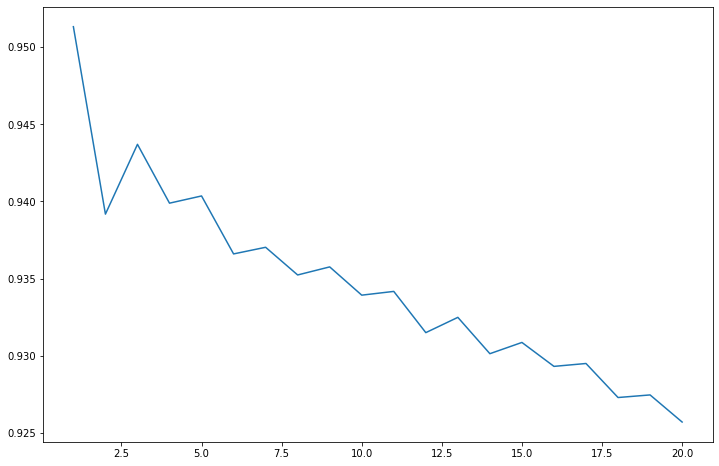

In [90]:
scores = []
for i in np.arange(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
plt.figure(figsize=(12,8))
sns.lineplot(np.arange(1,21),scores)

In [91]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

      GALAXY       0.94      0.91      0.93     17917
         QSO       0.96      0.97      0.97     17571
        STAR       0.95      0.97      0.96     18013

    accuracy                           0.95     53501
   macro avg       0.95      0.95      0.95     53501
weighted avg       0.95      0.95      0.95     53501



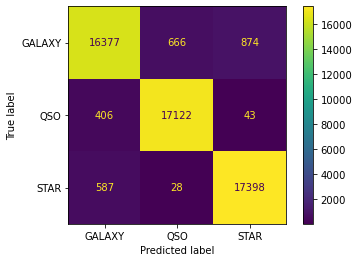

In [92]:
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))
plot_confusion_matrix(knn,X_test,y_test)

## Deep Learning

### Training and evaluating Artificial Neural Networks(ANN) model

In [117]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64,activation="relu"))
ann.add(tf.keras.layers.Dense(units=32,activation="relu"))
ann.add(tf.keras.layers.Dense(units=16,activation="relu"))
ann.add(tf.keras.layers.Dense(units=5,activation="relu"))
ann.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])

In [118]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [119]:
ann.fit(X_train,y_train_encoded,batch_size=400,validation_data=(X_test,y_test_encoded),epochs=100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

313/313 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.1562 - val_loss: 0.1526 - val_accuracy: 0.1625
Epoch 2/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.2342 - val_loss: 0.0853 - val_accuracy: 0.3038
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.3482 - val_loss: 0.0665 - val_accuracy: 0.3736
Epoch 4/100
313/313 [==============================] - 0s 1ms/step - loss: 0.06

313/313 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.4352 - val_loss: 0.0341 - val_accuracy: 0.3458
Epoch 53/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.4502 - val_loss: 0.0369 - val_accuracy: 0.4147
Epoch 54/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.4450 - val_loss: 0.0373 - val_accuracy: 0.3338
Epoch 55/100
313/313 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.4389 - val_loss: 0.0343 - val_accuracy: 0.4400
Epoch 56/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.4446 - val_loss: 0.0352 - val_accuracy: 0.4539
Epoch 57/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.4487 - val_loss: 0.0364 - val_accuracy: 0.5445
Epoch 58/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.4549 - val_loss: 0.0356 - val_accuracy: 0.3837
Epoch

In [120]:
ann_pred = ann.predict(X_test)
ann_pred

array([[0.       , 0.       , 0.       , 0.       , 0.       ],
       [2.0086582, 2.006001 , 2.0102787, 2.0119133, 2.0081525],
       [1.9840915, 1.9847105, 1.9876422, 1.9889759, 1.9851391],
       ...,
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [1.9955904, 1.9896452, 1.990125 , 1.9930044, 1.9947476],
       [1.9947579, 1.991194 , 1.9918998, 1.9976671, 1.9971128]],
      dtype=float32)

In [121]:
ann_scores = []
for x in ann_pred:
    ann_scores.append(round(np.mean(x)))
ann_scores

[0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 2,


In [122]:
print("R2 Score of ANN:", str(np.round(r2_score(y_test_encoded,ann_scores)*100,2)) + '%')

R2 Score of ANN: 94.19%


## Performance Analysis of all Used Models

In [124]:
print("Accuracy Score of Logistic Regression CV:",str(np.round(logmodel.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ridge Classifier:",str(np.round(ridge.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of SGD Classifier:",str(np.round(sgd.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Passive Aggressive Classifier:",str(np.round(pac.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of K Nearest Neighbors Classifier:",str(np.round(knn.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Support Vector Machines Classifier:",str(np.round(svm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(gnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bernoulli Naive Bayes:",str(np.round(bnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rfc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of XG Boost Classifier:",str(np.round(xgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gradient Boosting Classifier:",str(np.round(gbc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Histogram-based Gradient Boosting Classifier:",str(np.round(hist.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bagging Classifier:",str(np.round(bag.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ada Boost Classifier:",str(np.round(abc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Cat Boost Classifier:",str(np.round(cat.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Light Gradient Boosting Model:",str(np.round(lgbm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(et.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Voting Classifier:",str(np.round(vc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Artificial Neural Networks:",str(np.round(r2_score(y_test_encoded,ann_scores)*100,2)) + '%')

Accuracy Score of Logistic Regression CV: 95.26%
Accuracy Score of Ridge Classifier: 78.04%
Accuracy Score of SGD Classifier: 93.08%
Accuracy Score of Passive Aggressive Classifier: 85.61%
Accuracy Score of K Nearest Neighbors Classifier: 95.13%
Accuracy Score of Support Vector Machines Classifier: 96.65%
Accuracy Score of Gaussian Naive Bayes: 92.62%
Accuracy Score of Bernoulli Naive Bayes: 62.64%
Accuracy Score of Decision Tree Classifier: 96.6%
Accuracy Score of Random Forest Classifier: 98.01%
Accuracy Score of XG Boost Classifier: 97.21%
Accuracy Score of Gradient Boosting Classifier: 97.74%
Accuracy Score of Histogram-based Gradient Boosting Classifier: 98.06%
Accuracy Score of Bagging Classifier: 97.73%
Accuracy Score of Ada Boost Classifier: 66.7%
Accuracy Score of Cat Boost Classifier: 98.18%
Accuracy Score of Light Gradient Boosting Model: 98.07%
Accuracy Score of Extra Trees Classifier: 98.09%
Accuracy Score of Voting Classifier: 97.8%
Accuracy Score of Artificial Neural Net

Cat Boost Classifier is the best performing model boasting an incredible prediction accuracy of more than 98%.

## Saving the model for future use

In [125]:
joblib.dump(cat,'model.pkl')

['model.pkl']

In [126]:
model = joblib.load('model.pkl')
model

In [127]:
joblib.dump(scaler,'scaler.bin')

['scaler.bin']

In [128]:
scaler = joblib.load('scaler.bin')
scaler

StandardScaler()